<a href="https://colab.research.google.com/github/lcsaszar01/python_projects/blob/main/ResearchMethods_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip3 install scipy==1.7.3

# We're going to use scipy.stats package along with matplotlib
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D


### 📊 Exploring the Normal Distribution
The **normal distribution** is one of the most fundamental distributions in statistics. It's fully characterized by two parameters:
* **Mean** (μ): the center of the distribution
* **Standard deviation** (σ): the spread of the distribution

We'll use `scipy.stats` to extract key theoretical properties of the **standard normal distribution** (mean = 0, std = 1):

In [ ]:
mean, var, skew, kurt = stats.norm.stats(moments='mvsk')
f'mean: {mean}, variance: {var}, skew: {skew}, kurtosis: {kurt}'

'mean: 0.0, variance: 1.0, skew: 0.0, kurtosis: 0.0'

#### 📘 What these values mean:
* **Mean (μ)**: The expected value or average.
* **Variance (σ²)**: The average squared deviation from the mean.
* **Skewness**: A measure of asymmetry. 0 means the distribution is perfectly symmetrical.
* **Kurtosis**: Measures "tailedness" or the extremity of outliers.
  * Note: SciPy returns **excess kurtosis**, so a normal distribution has kurtosis = 0.
  * Positive → heavy tails; Negative → light tails.



### 📈 Visualizing the Normal Distribution
Let's generate and plot the **PDF (Probability Density Function)** of the standard normal distribution.
#### 🧮 Step-by-step:
1. Use `np.linspace` to create a sequence of evenly spaced x-values between the 0.1% and 99.9% percentiles.
2. Evaluate the PDF of the standard normal distribution at those x-values.
3. Plot the result using `matplotlib`.



X values: [-3.09023231 -3.02780337 -2.96537444 -2.9029455  -2.84051656 -2.77808763
 -2.71565869 -2.65322976 -2.59080082 -2.52837189 -2.46594295 -2.40351402
 -2.34108508 -2.27865614 -2.21622721 -2.15379827 -2.09136934 -2.0289404
 -1.96651147 -1.90408253 -1.8416536  -1.77922466 -1.71679573 -1.65436679
 -1.59193785 -1.52950892 -1.46707998 -1.40465105 -1.34222211 -1.27979318
 -1.21736424 -1.15493531 -1.09250637 -1.03007744 -0.9676485  -0.90521956
 -0.84279063 -0.78036169 -0.71793276 -0.65550382 -0.59307489 -0.53064595
 -0.46821702 -0.40578808 -0.34335915 -0.28093021 -0.21850127 -0.15607234
 -0.0936434  -0.03121447  0.03121447  0.0936434   0.15607234  0.21850127
  0.28093021  0.34335915  0.40578808  0.46821702  0.53064595  0.59307489
  0.65550382  0.71793276  0.78036169  0.84279063  0.90521956  0.9676485
  1.03007744  1.09250637  1.15493531  1.21736424  1.27979318  1.34222211
  1.40465105  1.46707998  1.52950892  1.59193785  1.65436679  1.71679573
  1.77922466  1.8416536   1.90408253  1.966

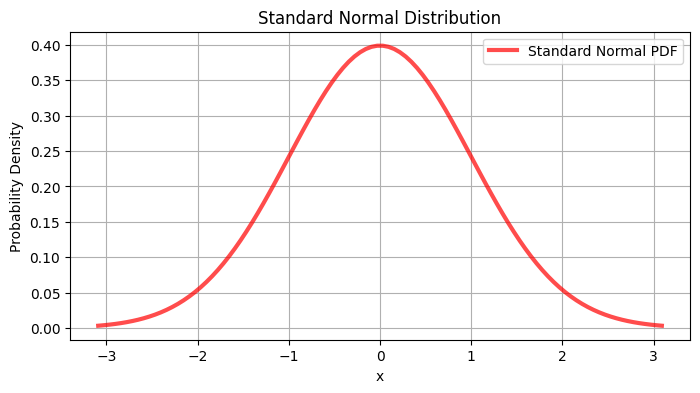

In [ ]:
# Step 1: Generate evenly spaced x-values covering most of the distribution
x = np.linspace(stats.norm.ppf(0.001),
                stats.norm.ppf(0.999), 100)

# Optional: print to inspect values
print("X values:", x)
print("PDF values:", stats.norm.pdf(x))

# Step 2 & 3: Plot the normal distribution's PDF
plt.figure(figsize=(8, 4))
plt.plot(x, stats.norm.pdf(x), 'r-', lw=3, alpha=0.7, label='Standard Normal PDF')
plt.title('Standard Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

### 📘 What this does:
* `stats.norm.ppf(q)` is the inverse of the CDF, or the "percent point function".
  * `ppf(0.001)` ≈ -3.09, and `ppf(0.999)` ≈ 3.09 → captures nearly all of the distribution.
* `stats.norm.pdf(x)` computes the PDF value at each `x`.
* `plt.plot(...)` draws the familiar bell curve.

### 🎲 Sampling from the Normal Distribution
Let's draw **random samples** from a normal distribution and compare the resulting histogram with its theoretical properties.

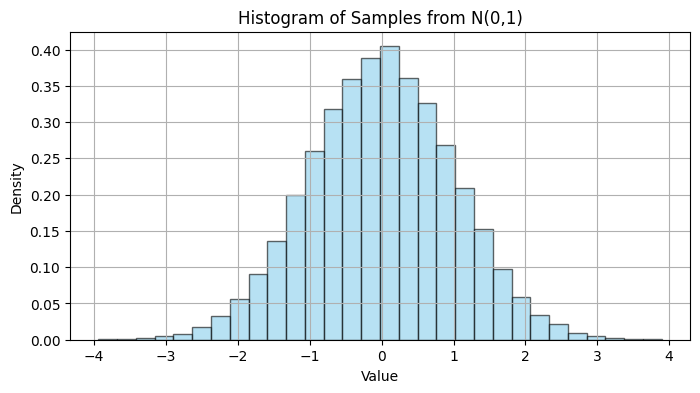

'mean: 0.0, variance: 1.0, skew: 0.0, kurtosis: 0.0'

In [ ]:
# Define a normal distribution with mean = 0 and std = 1
distribution = stats.norm(loc=0, scale=1)

# Draw 10,000 random samples
sample = distribution.rvs(size=50000)

# Plot histogram of sampled data
plt.figure(figsize=(8, 4))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title('Histogram of Samples from N(0,1)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Retrieve and display theoretical moments
m, v, s, k = distribution.stats('mvsk')
f'mean: {m}, variance: {v}, skew: {s}, kurtosis: {k}'

### 📘 What this does:
* `stats.norm(loc=0, scale=1)` creates a normal distribution object with specified parameters.
* `.rvs(size=10000)` generates 10,000 random values from that distribution.
* `plt.hist(..., density=True)` creates a histogram normalized to form a probability density.
* The output `mean`, `variance`, `skewness`, and `kurtosis` show that the **theoretical** values of the distribution match what we expect for a standard normal.

### 📊 Comparing Sampled Data to the Theoretical Normal Curve
Let's overlay the **theoretical normal PDF** on top of the histogram of the sampled data to see how well the sample approximates the true distribution.

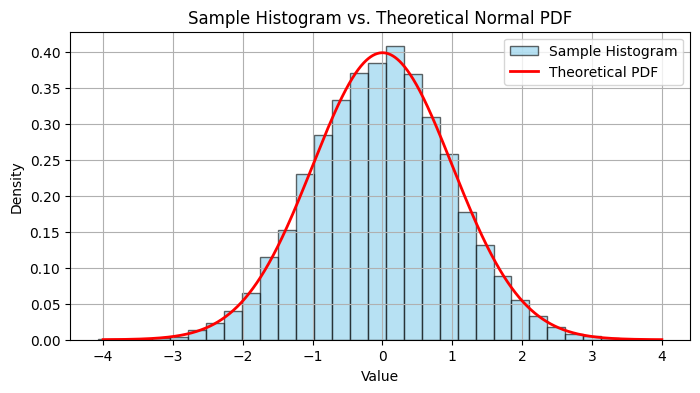

In [ ]:
# Create normal distribution object
distribution = stats.norm(loc=0, scale=1)

# Sample 10,000 values
sample = distribution.rvs(size=10000)

# Create x values for the PDF line
x = np.linspace(-4, 4, 1000)
pdf = distribution.pdf(x)

# Plot histogram and PDF overlay
plt.figure(figsize=(8, 4))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sample Histogram')
plt.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')
plt.title('Sample Histogram vs. Theoretical Normal PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

### 🧠 Key Takeaways:
* The **histogram** shows the distribution of sampled data.
* The **red curve** is the true PDF of the normal distribution.
* As sample size increases, the histogram should more closely match the theoretical curve—this illustrates the **Law of Large Numbers** in action.



## 🎯 The T-Distribution: Small-Sample Adjustments
When dealing with smaller sample sizes (typically $n<30$), we often use the **Student's T-distribution** instead of the normal distribution. It looks similar to the normal curve but has **heavier tails**, which account for the extra uncertainty from estimating the population standard deviation.
* * *
#### ℹ️ Key Concept: Degrees of Freedom (df)
The shape of the t-distribution depends on the **degrees of freedom** (df), which are typically calculated as:

$\textrm{df}=n−1$

Where $n$ is the sample size. As $df \to \infty$, the T-distribution approaches the normal distribution.



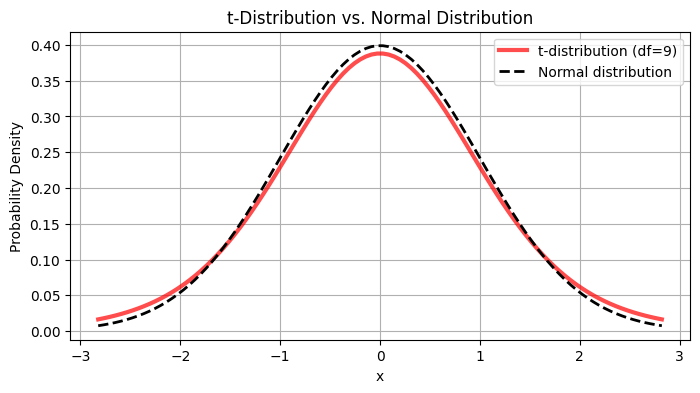

In [ ]:
# Sample size
n = 10
df = n - 1  # degrees of freedom

# Generate x values across the central 98% of the t-distribution
x = np.linspace(stats.t.ppf(0.01, df=df),
                stats.t.ppf(0.99, df=df), 100)

# Plot the t-distribution PDF
plt.figure(figsize=(8, 4))
plt.plot(x, stats.t.pdf(x, df=df), 'r-', lw=3, alpha=0.7, label=f't-distribution (df={df})')

# Optionally overlay normal PDF for comparison
plt.plot(x, stats.norm.pdf(x), 'k--', lw=2, label='Normal distribution')

plt.title('t-Distribution vs. Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

####📈 Plotting t-Distributions with Different Degrees of Freedom



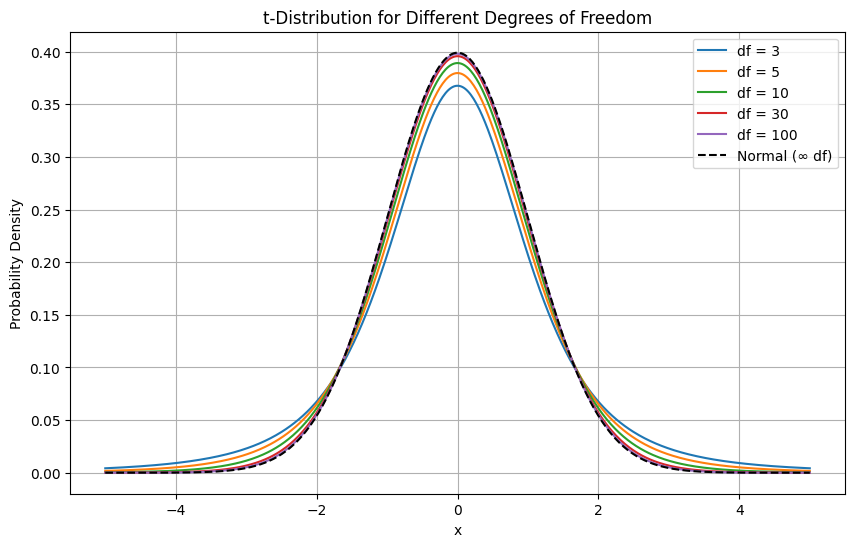

In [ ]:
# x-values for plotting
x = np.linspace(-5, 5, 500)

# Different degrees of freedom
dfs = [3, 5, 10, 30, 100]

plt.figure(figsize=(10, 6))

# Plot t-distributions with different dfs
for df in dfs:
    plt.plot(x, stats.t.pdf(x, df), label=f'df = {df}')

# Plot standard normal for reference
plt.plot(x, stats.norm.pdf(x), 'k--', label='Normal (∞ df)')

plt.title('t-Distribution for Different Degrees of Freedom')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### 🧠 Key Takeaways:
* Smaller df → heavier tails → more uncertainty.
* As df increases, the t-distribution approaches the normal distribution.
* This shows why we use t-tests for small samples and z-tests for large ones.



####Sampling from a T-Distribution
Let's draw a random sample and compute empirical statistics (mean, variance, skewness, kurtosis) to compare with the theoretical values.

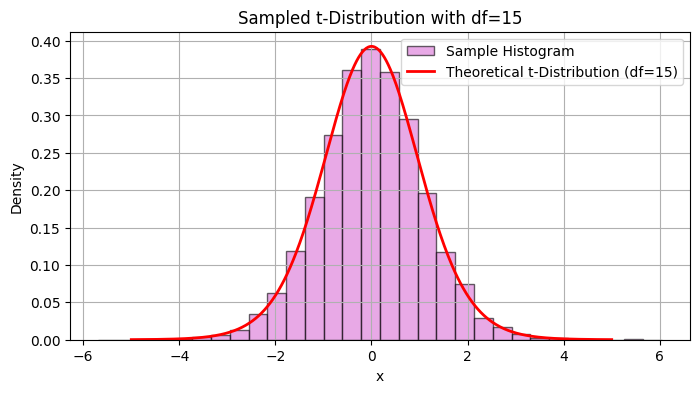

,Sample Mean,Sample Variance,Sample Skewness,Sample Kurtosis,Theoretical Mean,Theoretical Variance,Theoretical Skewness,Theoretical Kurtosis
Empirical,0.000745,1.156057,0.01283,0.602679,NaN,NaN,NaN,NaN
Theoretical,NaN,NaN,NaN,NaN,0.0,1.153846,0.0,0.545455


In [ ]:
# Degrees of freedom
df = 15

# Define t-distribution
t_dist = stats.t(df=df)

# Sample from the distribution
sample = t_dist.rvs(size=10000)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='orchid', edgecolor='black', label='Sample Histogram')

# Overlay theoretical PDF
x = np.linspace(-5, 5, 500)
plt.plot(x, t_dist.pdf(x), 'r-', lw=2, label=f'Theoretical t-Distribution (df={df})')
plt.title(f'Sampled t-Distribution with df={df}')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Compare sample vs. theoretical statistics
empirical_stats = {
    'Sample Mean': np.mean(sample),
    'Sample Variance': np.var(sample),
    'Sample Skewness': stats.skew(sample),
    'Sample Kurtosis': stats.kurtosis(sample)  # excess kurtosis
}

theoretical_stats = {
    'Theoretical Mean': t_dist.mean(),
    'Theoretical Variance': t_dist.var(),
    'Theoretical Skewness': t_dist.stats(moments='s'),
    'Theoretical Kurtosis': t_dist.stats(moments='k')
}

import pandas as pd
pd.DataFrame([empirical_stats, theoretical_stats], index=["Empirical", "Theoretical"])


##🎯 Discrete Distributions: Binomial, Geometric, and Beta-Binomial
***
Many real-world scenarios involve **discrete outcomes**, such as flipping coins, answering questions correctly, or waiting for the first success.
Well explore:
1. **Binomial Distribution** – Fixed number of trials
2. **Geometric Distribution** – Waiting for first success
3. **Beta-Binomial Distribution** – Binomial with uncertainty in the success probability



1️⃣ Binomial Distribution
***
The **Binomial distribution** models the number of successes in a fixed number of independent trials with the same probability of success.
#### Parameters:
* $n$: number of trials
* $p$: probability of success in each trial



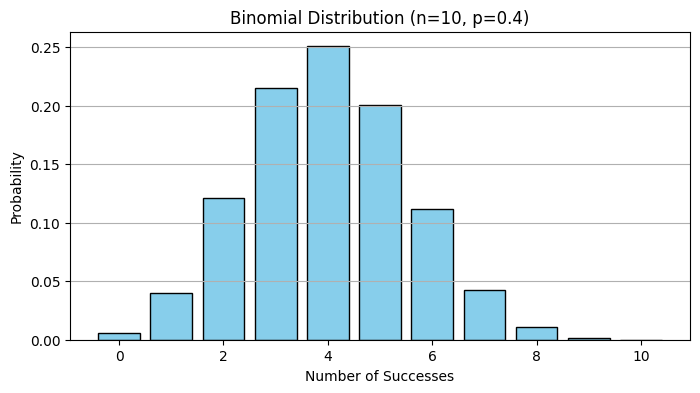

In [ ]:
# Parameters
n = 10  # number of trials
p = 0.4  # probability of success

# Values from 0 to n
x = np.arange(0, n + 1)

# PMF values
pmf = stats.binom.pmf(x, n, p)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(True, axis='y')
plt.show()


### 🧠 Key Takeaways:
* Models **how many successes** occur in a fixed number of independent Bernoulli trials.
* The distribution becomes more symmetric as nnn increases.
* Useful for yes/no outcomes (e.g., pass/fail, click/no-click).



###2️⃣ Geometric Distribution
The Geometric distribution models the number of trials until the first success.

Parameters:
* $p$: probability of success

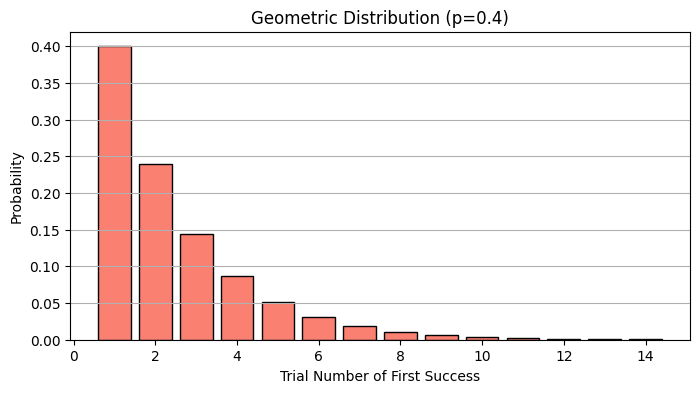

In [ ]:
# Probability of success
p = 0.4

# Trial numbers
x = np.arange(1, 15)

# PMF values
pmf = stats.geom.pmf(x, p)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(x, pmf, color='salmon', edgecolor='black')
plt.title(f'Geometric Distribution (p={p})')
plt.xlabel('Trial Number of First Success')
plt.ylabel('Probability')
plt.grid(True, axis='y')
plt.show()

### 🧠 Key Takeaways:
* Models **waiting time** until first success.
* Memoryless: the probability of success on the next trial is always $p$, regardless of past trials.



3️⃣ Beta-Binomial Distribution
***
The **Beta-Binomial distribution** is a Bayesian generalization of the binomial, where the success probability $p$ is drawn from a **Beta distribution**. It captures **uncertainty** about the true success probability. This is not in `scipy.stats` by default, so we’ll use `scipy.special` to compute it manually.



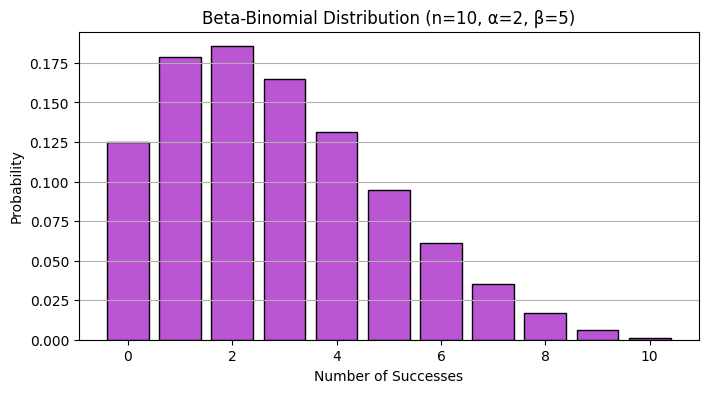

In [ ]:
# Parameters
n = 10       # number of trials
a, b = 2, 5  # Beta prior parameters (alpha, beta)

# x-axis: number of successes from 0 to n
x = np.arange(0, n + 1)

# PMF using scipy's built-in Beta-Binomial distribution
pmf = stats.betabinom.pmf(x, n, a, b)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(x, pmf, color='mediumorchid', edgecolor='black')
plt.title(f'Beta-Binomial Distribution (n={n}, α={a}, β={b})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(True, axis='y')
plt.show()

### 📘 Explanation:
* `betabinom.pmf(k, n, a, b)` computes the probability of observing `k` successes in `n` trials, where the success probability follows a **Beta($\alpha$=a, $\beta$=b)** prior.
* This is a great model for **overdispersed** binomial data, i.e., where the variance is larger than what a standard binomial would predict.



###🎯 Beta-Binomial vs. Binomial (Same Expected Value)
***
We'll overlay both distributions:
* The **Binomial** has fixed $p=\frac{a}{a + b}$
* The **Beta-Binomial** has uncertainty in $p$ modeled by a Beta prior



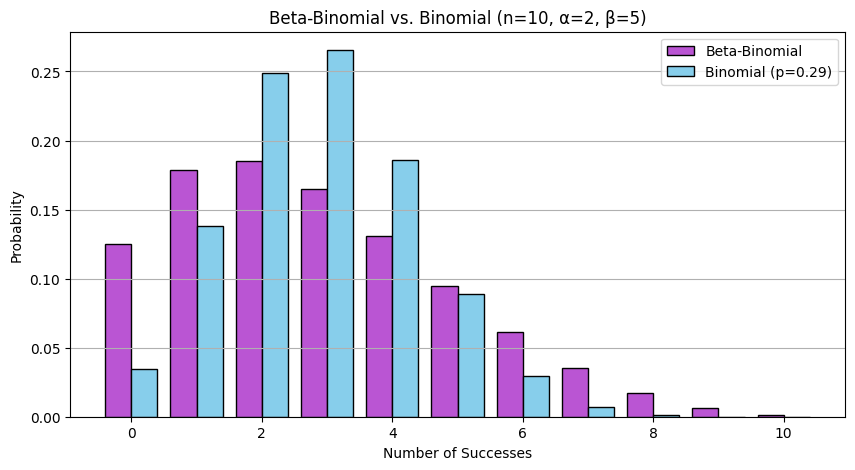

In [ ]:

# Parameters
n = 10       # number of trials
a, b = 2, 5  # Beta prior parameters
p = a / (a + b)  # Expected value of p under Beta(a, b)

# Support
x = np.arange(0, n + 1)

# PMFs
beta_binom_pmf = stats.betabinom.pmf(x, n, a, b)
binom_pmf = stats.binom.pmf(x, n, p)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, beta_binom_pmf, width=0.4, color='mediumorchid', edgecolor='black', label='Beta-Binomial')
plt.bar(x + 0.2, binom_pmf, width=0.4, color='skyblue', edgecolor='black', label=f'Binomial (p={p:.2f})')
plt.title(f'Beta-Binomial vs. Binomial (n={n}, α={a}, β={b})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, axis='y')
plt.show()


### 🧠 Key Insight:
* The **Beta-Binomial** is **wider and flatter**—it reflects the **extra uncertainty** about $p$.
* The **Binomial** is **narrower**—it assumes we know $p$ exactly.
* This comparison helps to see how incorporating **prior uncertainty** affects the outcome.



##📏 Central Limit Theorem (CLT)
### 📘 Definition
The **Central Limit Theorem** states that:
> Given a large enough sample size, the **sampling distribution of the sample mean** will approximate a **normal distribution**, regardless of the original distribution's shape—**provided the original distribution has finite mean and variance**.
In other words, **averages** of repeated samples tend to form a bell-shaped curve, even when the underlying data is not normally distributed.
***
###🎲 Demonstrating the CLT with the Beta-Binomial
Let's repeatedly sample from a **Beta-Binomial distribution** and compute the **sample mean** of each group. Then we'll visualize the distribution of these sample means.
We expect this distribution of sample means to **look normal** (bell-shaped), thanks to the CLT.




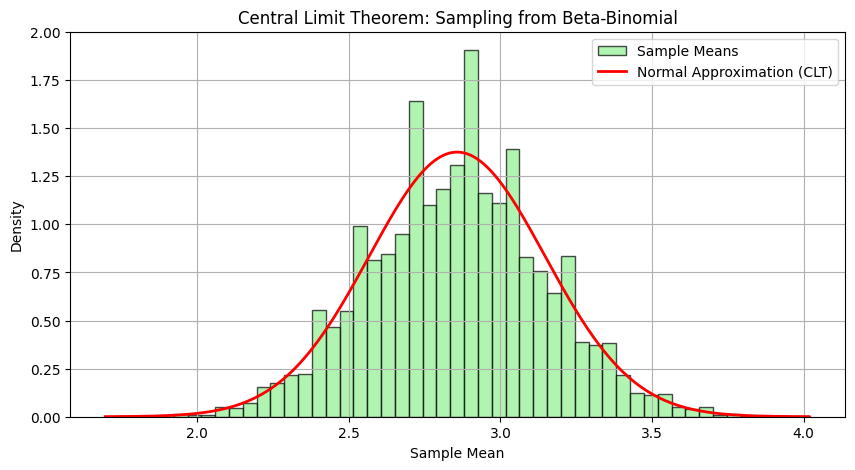

In [ ]:
# Beta-Binomial parameters
n = 10       # number of trials per sample
a, b = 2, 5  # Beta prior parameters

# Sampling parameters
num_samples = 10000      # number of repeated samples
sample_size = 50         # how many values in each sample

# Generate many sample means
sample_means = []
for _ in range(num_samples):
    sample = stats.betabinom.rvs(n=n, a=a, b=b, size=sample_size)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Convert to array
sample_means = np.array(sample_means)

# Plot histogram of sample means
plt.figure(figsize=(10, 5))
plt.hist(sample_means, bins=50, density=True, color='lightgreen', edgecolor='black', alpha=0.7, label='Sample Means')

# Overlay a normal distribution with matching mean and std
mean = np.mean(sample_means)
std = np.std(sample_means)
x = np.linspace(mean - 4*std, mean + 4*std, 500)
plt.plot(x, stats.norm.pdf(x, loc=mean, scale=std), 'r-', lw=2, label='Normal Approximation (CLT)')

plt.title('Central Limit Theorem: Sampling from Beta-Binomial')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


####🧠 Key Takeaways:
* The original Beta-Binomial distribution is skewed and discrete.

* But the distribution of sample means is approximately normal.

* This is the power of the Central Limit Theorem—it lets us make inferences using the normal distribution even when the original data isn't normal.

###📊 Central Limit Theorem: Effect of Sample Size and Repetition
***
We'll compare:
* Small sample size per group vs. large sample size per group
* Fewer sample means vs. many sample means



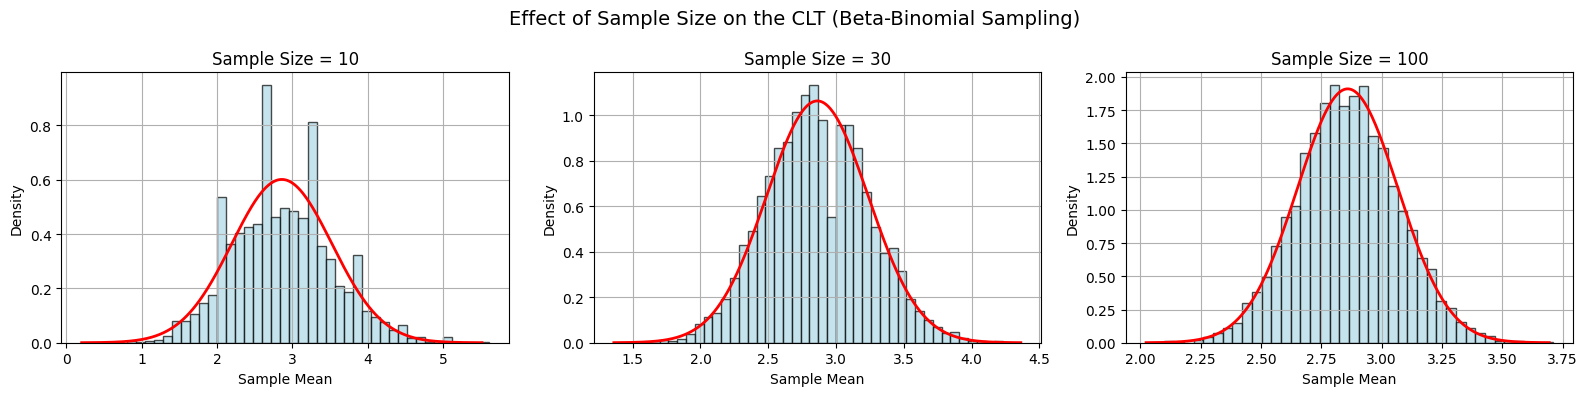

In [ ]:
# Parameters
n = 10       # Beta-binomial trials
a, b = 2, 5  # Beta parameters
num_samples = 5000       # number of sample means to generate
sample_sizes = [10, 30, 100]  # different group sizes

plt.figure(figsize=(16, 4))

for i, sample_size in enumerate(sample_sizes):
    means = []
    for _ in range(num_samples):
        sample = stats.betabinom.rvs(n=n, a=a, b=b, size=sample_size)
        means.append(np.mean(sample))

    means = np.array(means)
    mu, sigma = np.mean(means), np.std(means)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)

    plt.subplot(1, 3, i+1)
    plt.hist(means, bins=40, density=True, alpha=0.7, color='lightblue', edgecolor='black')
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2)
    plt.title(f'Sample Size = {sample_size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.grid(True)

plt.suptitle('Effect of Sample Size on the CLT (Beta-Binomial Sampling)', fontsize=14)
plt.tight_layout()
plt.show()


### 🧠 Interpretation:
* With **larger sample sizes per group**, the sampling distribution becomes smoother and closer to a normal curve.
* Small samples still show skew and discrete "chunkiness."



###🧪Varying Number of Samples

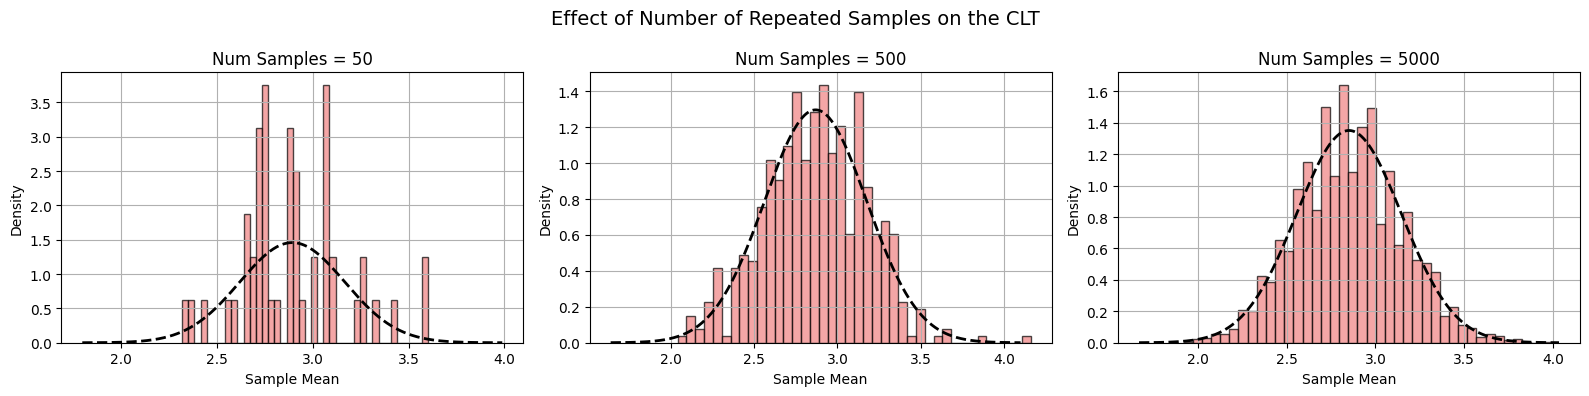

In [ ]:
sample_size = 50  # fixed sample size per group
num_samples_list = [50, 500, 5000]

plt.figure(figsize=(16, 4))

for i, num_samples in enumerate(num_samples_list):
    means = []
    for _ in range(num_samples):
        sample = stats.betabinom.rvs(n=n, a=a, b=b, size=sample_size)
        means.append(np.mean(sample))

    means = np.array(means)
    mu, sigma = np.mean(means), np.std(means)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)

    plt.subplot(1, 3, i+1)
    plt.hist(means, bins=40, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'k--', lw=2)
    plt.title(f'Num Samples = {num_samples}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.grid(True)

plt.suptitle('Effect of Number of Repeated Samples on the CLT', fontsize=14)
plt.tight_layout()
plt.show()


###Skewed Distribution and CLT

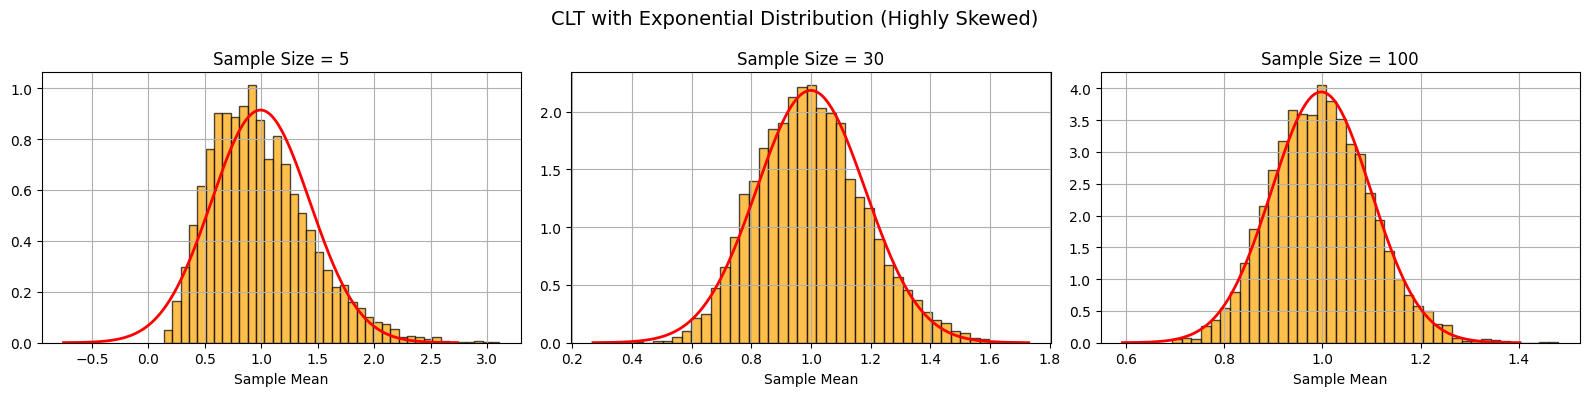

In [ ]:
sample_sizes = [5, 30, 100]
num_samples = 5000

plt.figure(figsize=(16, 4))

for i, sample_size in enumerate(sample_sizes):
    means = [np.mean(stats.expon.rvs(scale=1, size=sample_size)) for _ in range(num_samples)]
    mu, sigma = np.mean(means), np.std(means)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)

    plt.subplot(1, 3, i+1)
    plt.hist(means, bins=40, density=True, alpha=0.7, color='orange', edgecolor='black')
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2)
    plt.title(f'Sample Size = {sample_size}')
    plt.xlabel('Sample Mean')
    plt.grid(True)

plt.suptitle('CLT with Exponential Distribution (Highly Skewed)', fontsize=14)
plt.tight_layout()
plt.show()

###✅ Summary: Exploring Distributions and the Central Limit Theorem

Over the last sections, we've built a strong foundation in statistical thinking by working with various distributions and understanding their properties.

***
### 🔢 What We Covered
#### 🧩 **Discrete Distributions**
* **Binomial**: Number of successes in fixed trials
* **Geometric**: Trials until first success
* **Beta-Binomial**: Binomial with uncertainty in $p$

#### 📐 **Continuous Distributions**
* **Normal**: Symmetrical bell curve
* **t-Distribution**: Used when variance is estimated; has heavier tails
* **Beta**: Distribution over probabilities
* **Exponential**: Time until first event; highly skewed
* * *
### 📊 Central Limit Theorem (CLT)
We demonstrated how the **sampling distribution of the mean**:
* Approaches a **normal distribution**, even when sampling from non-normal distributions
* **Improves with larger sample sizes**
* Becomes smoother with **more repeated samples**
* Works even for **discrete and skewed distributions**, like the Beta-Binomial or Exponential



### 🔬 Bonus Concepts Explored
| Concept | Insight |
| --- | --- |
| Sample Size | Larger samples → more normal and less variable means |
| Number of Repetitions | More samples → smoother, more stable distribution |
| Skewed Distributions | Take longer for CLT to "kick in" |
| Sample Mean vs. Median | CLT applies to both, but with different variances |
| Law of Large Numbers | Sample mean → population mean as $n \to \infty$ |
| Standard Error | Shrinks as $\frac{\sigma}{\sqrt{n}}$|



#Distribution Tests

We're going to us the standard *Play Tennis* dataset, which includes categorical and numerical features.

###🎯 Step 1: Look at the Dataset

In [ ]:
df = pd.DataFrame([['sunny',85,85,False,'no'],
['sunny',80,90,True,'no'],
['overcast',83,86,False,'yes'],
['rainy',70,96,False,'yes'],
['rainy',68,80,False,'yes'],
['rainy',65,70,True,'no'],
['overcast',64,65,True,'yes'],
['sunny',72,95,False,'no'],
['sunny',69,70,False,'yes'],
['rainy',75,80,False,'yes'],
['sunny',75,70,True,'yes'],
['overcast',72,90,True,'yes'],
['overcast',81,75,False,'yes'],
['rainy',71,91,True,'no']])

df.columns = ['outlook', 'temperature', 'humidity', 'windy', 'play']
df

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


###🧪 Step 2: Plot Distributions of Numerical Variables
Let's start by visualizing `temperature` and `humidity`:



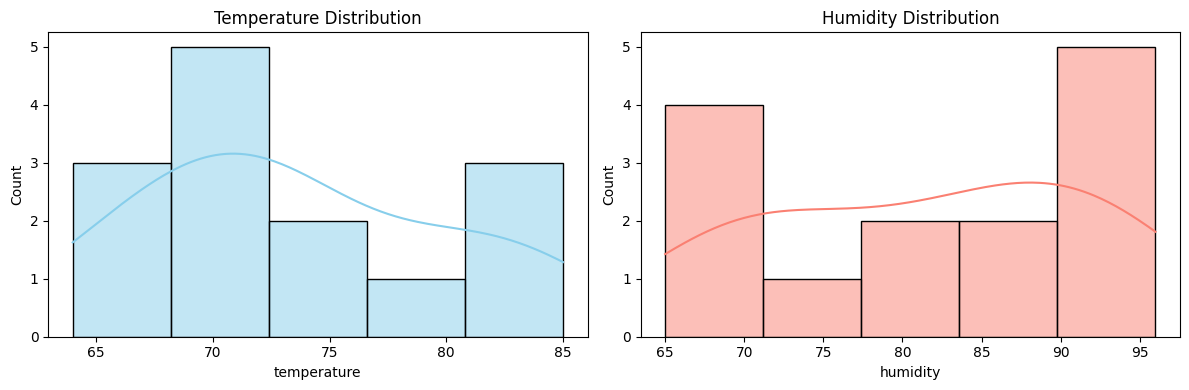

In [ ]:
# Plot histograms with KDE
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['temperature'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Temperature Distribution')

sns.histplot(df['humidity'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Humidity Distribution')

plt.tight_layout()
plt.show()

###📊 Q-Q Plots: Visual Normality Check
A **Q-Q (quantile-quantile) plot** compares the quantiles of a dataset to the quantiles of a theoretical normal distribution. If the data is normally distributed, the points should fall roughly along the diagonal line.

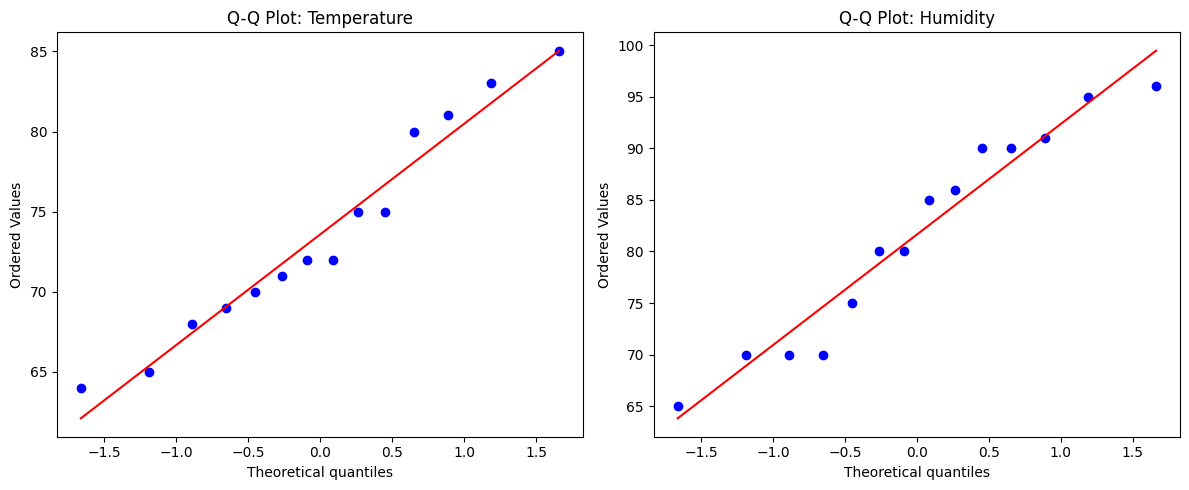

In [ ]:
# Create side-by-side Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q plot for temperature
stats.probplot(df['temperature'], dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot: Temperature")

# Q-Q plot for humidity
stats.probplot(df['humidity'], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot: Humidity")

plt.tight_layout()
plt.show()

### 🧠 Interpretation Guide:
* ✅ If the points follow the **diagonal line closely**, the data is likely normally distributed.
* ❌ If the points **curve away** or **bend at the ends**, the data may be skewed or heavy-tailed (non-normal).

###🧪 Normality Tests
You can now run **formal tests** to assess if the data is normally distributed. Here are two common ones:

In [ ]:
stat_temp, p_temp = stats.shapiro(df['temperature'])
stat_humid, p_humid = stats.shapiro(df['humidity'])

print(f'Temperature: W={stat_temp:.4f}, p-value={p_temp:.4f}')
print(f'Humidity: W={stat_humid:.4f}, p-value={p_humid:.4f}')

Temperature: W=0.9496, p-value=0.5548
Humidity: W=0.9298, p-value=0.3036


**Interpretation**:
* **Null hypothesis ($H_0$)**: Data is normally distributed
* **Low p-value (< 0.05)** → reject $H_0$ → data **not normal**



####📌 D'Agostino and Pearson's Test

In [ ]:
stat_temp2, p_temp2 = stats.normaltest(df['temperature'])
stat_humid2, p_humid2 = stats.normaltest(df['humidity'])

print(f'Temperature: stat={stat_temp2:.4f}, p-value={p_temp2:.4f}')
print(f'Humidity: stat={stat_humid2:.4f}, p-value={p_humid2:.4f}')

Temperature: stat=1.0423, p-value=0.5938
Humidity: stat=2.6722, p-value=0.2629


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


###📌 Why Use `normaltest()`?
| Feature | `normaltest()` |
| --- | --- |
| Test Type | D'Agostino and Pearson omnibus test |
| Checks | Skewness **and** Kurtosis |
| Best For | Medium to large samples (n > ~20) |
| Strength | More comprehensive than Shapiro, checks multiple aspects of shape |

It gives you both a **test statistic** and a **p-value**. If the **p-value is less than 0.05**, you reject the null hypothesis that the data is normal.

* * *
###🤔 Why Use This Over `shapiro()`?
| Comparison | `normaltest()` | `shapiro()` |
| --- | --- | --- |
| Sample Size | Better for n > 20 | More accurate for small samples |
| Checks | Skew + Kurtosis | Overall shape |
| Robustness | Can be more powerful with larger data | More conservative in small samples |
| Limitation | Less reliable for very small n | Doesn't give specific reasons for non-normality |

Since this dataset has only **14 observations**, `shapiro()` is technically more appropriate in this case—but it's good to consider both:
* `shapiro()` is the **go-to test for small samples**
* `normaltest()` is **more general-purpose omnibus testing**



#🧠 WTF is a Z-Score, Really?

A **Z-score** tells you **how far** a value is from the **population mean**, measured in units of **standard deviations**.

$$Z = \frac{\text{Your Value} - \text{Population Mean}}{\text{Standard Deviation}}$$

Think of it like this:
> "If we live in a world where the mean is 78, and we observe something with mean = 74.5, how _surprising_ is that?"





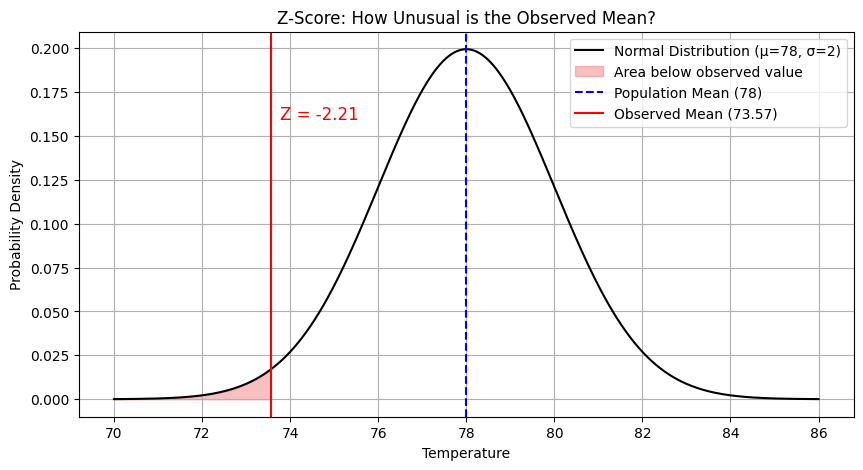

In [ ]:
# Population mean and standard deviation
pop_mean = 78
pop_std = 2  # you can play with this

# Observed value
observed_mean = df['temperature'].mean()

# Compute z-score
z = (observed_mean - pop_mean) / pop_std

# X range for normal curve
x = np.linspace(pop_mean - 4*pop_std, pop_mean + 4*pop_std, 500)
y = stats.norm.pdf(x, pop_mean, pop_std)

# Plot normal distribution
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Normal Distribution (μ=78, σ=2)', color='black')

# Shade regions
plt.fill_between(x, y, where=(x < observed_mean), color='lightcoral', alpha=0.5, label='Area below observed value')

# Mark mean and observed value
plt.axvline(pop_mean, color='blue', linestyle='--', label='Population Mean (78)')
plt.axvline(observed_mean, color='red', linestyle='-', label=f'Observed Mean ({observed_mean:.2f})')

# Annotate z-score
plt.text(observed_mean + 0.2, max(y)*0.8, f'Z = {z:.2f}', fontsize=12, color='red')

plt.title('Z-Score: How Unusual is the Observed Mean?')
plt.xlabel('Temperature')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### 🔍 Wait, What's a Z-Score?

* $Z = 0$: You're right at the population mean
* $Z = \pm 1$: One standard deviation away
* $Z = \pm 2$ or more: That's pretty far out!



##🧪 One-Sample Z-Test (Known Population Standard Deviation)
### ✅ When to Use:
* You're comparing a **sample mean** to a known
**population mean**.
* You **know** the population standard deviation ($\sigma$).
* The sample is **random and approximately normal** (or large enough).
* * *
### 💡 Hypotheses
Let's test whether the temperature data comes from a population with mean = 78.
* $H_0$: The true mean = 78
* $H_1$: The true mean $\ne$ 78 (two-tailed)
* * *
### 🧪 One-Sample Z-Test



In [ ]:
# Population parameters (assumed known)
pop_mean = 78
pop_std = 2  # assumed known

# Sample statistics
sample = df['temperature']
sample_mean = sample.mean()
sample_size = len(sample)

# Compute standard error
standard_error = pop_std / np.sqrt(sample_size)

# Compute z-statistic
z = (sample_mean - pop_mean) / standard_error

# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Z-score: {z:.2f}")
print(f"P-value (two-tailed): {p_value:.4f}")

Sample Mean: 73.57
Z-score: -8.29
P-value (two-tailed): 0.0000


### 🧠 Interpretation:
* **If p < 0.05**, we typically reject the null hypothesis: the sample mean is significantly different from 78.
* **If p ≥ 0.05**, we **fail to reject** the null: the data is consistent with a population mean of 78.

###🤔 But What If We Don’t Know the Standard Deviation?
Okay, so before we said:
> "Let's assume we know the population standard deviation is 2."

But honestly... when do you ever _actually_ know the population standard deviation? 🤷‍♂️
In most real-world cases, **you don't**. So instead of a Z-test, we use a **T-test**.
* * *
### 🎯 One-Sample T-Test: Testing Against a Known Mean
We'll ask the same question:
> "Is the mean of our sample significantly different from 78?"
But this time, we estimate the standard deviation from the sample.
* * *
### 🧪 One-Sample t-Test



In [ ]:
# Our sample data
sample = df['temperature']

# Hypothesized population mean
hypothesized_mean = 78

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(sample, popmean=hypothesized_mean)

print(f"Sample Mean: {sample.mean():.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value (two-tailed): {p_value:.4f}")

### 🧠 What Just Happened?
* The **T-statistic** tells us how far the sample mean is from 78, in units of the sample's standard error.
* The **p-value** tells us the probability of seeing this data (or something more extreme) if the true mean really _was_ 78.



###🎲 What _Is_ a p-value, Really?
> The **p-value** is the probability of getting data **as extreme or more extreme** than what you observed, **if the null hypothesis were true**.
* * *
### 📦 Think of it Like This:
Imagine you believe the population mean is 78.
Now:
* You take a sample of temperatures
* You get a mean that's a bit lower (let's say 74.5)
* Then you ask:
> 🤔 "How _weird_ is that? Would I get a sample mean that low **just by random chance** if the true mean were 78?
* * *
### 🎲 Stochastic Framing:
If you **simulate thousands of random samples** under the assumption that the true mean is 78, how often do you get results like yours?
That's the **p-value**:
**the fraction of times random chance alone produces something as extreme as your actual data.**
* * *
### 🧪 Simulate the p-value Stochastically”



In [ ]:

# Parameters
pop_mean = 78
sample_size = len(df)
sample_mean = df['temperature'].mean()
sample_std = df['temperature'].std(ddof=1)

# Simulate 10,000 sample means under the null
num_simulations = 10000
simulated_means = np.random.normal(loc=pop_mean, scale=sample_std / np.sqrt(sample_size), size=num_simulations)

# Compute how extreme the observed mean is
distance = abs(sample_mean - pop_mean)
extreme_mask = np.abs(simulated_means - pop_mean) >= distance
p_value_sim = np.mean(extreme_mask)

# Create histogram bins (shared)
bins = np.linspace(min(simulated_means), max(simulated_means), 50)

# Compute histogram of all means (normalized)
all_counts, bin_edges = np.histogram(simulated_means, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Compute histogram of extreme values (same bins, normalized to full set)
extreme_counts, _ = np.histogram(simulated_means[extreme_mask], bins=bins, density=False)
extreme_density = extreme_counts / (len(simulated_means) * (bin_edges[1] - bin_edges[0]))

# Plot full distribution
plt.figure(figsize=(10, 5))
plt.bar(bin_centers, all_counts, width=bin_edges[1] - bin_edges[0], color='lightgray', edgecolor='black', alpha=0.7, label='Simulated Means (Null True)')

# Overlay extreme area (correctly scaled)
plt.bar(bin_centers, extreme_density, width=bin_edges[1] - bin_edges[0], color='salmon', alpha=0.8, label='More Extreme Than Observed')

# Add vertical lines
plt.axvline(pop_mean, color='blue', linestyle='--', label='Null Mean = 78')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Observed Mean = {sample_mean:.2f}')

# Final plot setup
plt.title(f'Simulated p-value (area beyond observed mean): p ≈ {p_value_sim:.4f}')
plt.xlabel('Simulated Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

####✅ The p-value as a Proportion of Area
When we simulate sample means under the **null hypothesis**, we get a bunch of values that form a smooth **bell-shaped histogram** (the gray bars). The **red bars** are the ones that are _as or more extreme_ than the observed mean.
* * *
### 📦 So What's the p-value?
You can think of the histogram as a collection of **little boxes** (bins):
* Each box has a **height** (density) and a **width** (bin width).
* The **area** of each box = height $\times$ width
* The **total area** under the whole histogram = 1 (because we used `density=True`)
So:
### 🔺 p-value ≈ total area of red boxes
If you were to:
* **Sum the areas** of all the red bars (left and right tails)
* That **sum is the p-value** This is why we compute:

`p_value_sim = np.mean(extreme_mask)`

Which is just the **fraction of samples** (or area) that landed in the red zone.
* * *
### 📌 TL;DR:
* Each **gray + red box** = a chunk of probability (area).
* The **red boxes** are the ones that count toward the p-value.
* So yes, **p-value = (sum of red box areas) / (sum of all box areas) = red area**, since the total area is 1.



##🎬 Animation:
Build the p-value from Boxes

In [ ]:
# Set up parameters
pop_mean = 78
sample_mean = df['temperature'].mean()
sample_std = df['temperature'].std(ddof=1)
sample_size = len(df)
standard_error = sample_std / np.sqrt(sample_size)

# Simulation setup
num_simulations = 300  # keep small for animation speed
samples = np.random.normal(loc=pop_mean, scale=standard_error, size=num_simulations)

# Define "extreme" cutoff
cutoff = abs(sample_mean - pop_mean)

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))
bins = np.linspace(pop_mean - 4*standard_error, pop_mean + 4*standard_error, 30)
bin_width = bins[1] - bins[0]

counts = np.zeros(len(bins) - 1)
extreme_mask = np.zeros_like(counts)

bars = ax.bar(bins[:-1], counts, width=bin_width, align='edge', edgecolor='black', alpha=0.7)

ax.axvline(pop_mean, color='blue', linestyle='--', label='Null Mean = 78')
ax.axvline(sample_mean, color='red', linestyle='--', label=f'Observed Mean = {sample_mean:.2f}')
text = ax.text(pop_mean, 0.9, '', transform=ax.get_xaxis_transform(), fontsize=12)

ax.set_title("Building the p-value from Sampled Means")
ax.set_xlabel("Simulated Sample Mean")
ax.set_ylabel("Count")
ax.set_ylim(0, 20)
ax.legend()

# Animation update function
def update(frame):
    sample = samples[frame]
    bin_index = np.digitize(sample, bins) - 1
    if 0 <= bin_index < len(counts):
        counts[bin_index] += 1
        is_extreme = abs(sample - pop_mean) >= cutoff
        color = 'salmon' if is_extreme else 'lightgray'
        bars[bin_index].set_height(counts[bin_index])
        bars[bin_index].set_color(color)
        if is_extreme:
            extreme_mask[bin_index] += 1

    # Update p-value
    total_draws = frame + 1
    extreme_total = np.sum(extreme_mask)
    p_val = extreme_total / total_draws
    text.set_text(f'Simulated p-value ≈ {p_val:.4f}')

# Run animation
ani = FuncAnimation(fig, update, frames=num_simulations, interval=30, repeat=False)
HTML(ani.to_jshtml())


###🧪 One-Sample t-Test:
"Is Our Mean Less Than 78?"
### 🧾 Hypotheses:
* $H_0$: The true mean = 78
* $H_1$: The true mean < 78 (one-tailed)

We're asking:
> "Is our sample mean significantly lower than 78?"



In [ ]:
# One-tailed t-test (mean < 78)
stat, p = stats.ttest_1samp(df['temperature'], 78, alternative='less')

f'Statistic: {stat:.4f}, p-value: {p:.4f}'

###🧠 What This Output Means

The test statistic (t-value) tells you how far the sample mean is from 78, in terms of standard error units.

The p-value tells you the probability of observing a mean this low (or lower) if the true mean was actually 78.

##🔍 What If You Have Two Distributions?

Let's say you want to compare `temperature` and `humidity` in your `df` to see if their **means are significantly different**.
* * *

###🧪 Two-Sample (Independent) t-Test
This answers the question:
> "Is the mean temperature significantly different from the mean humidity?"

### 🧾 Hypotheses
* $H_0$: The means of the two groups are equal
* $H_1$: The means are different (two-tailed)

This is kind of weird because `temperature` and `humidity` are measured on different scales, Python doesn't care — it just tests the means as numeric vectors. Let's just go with it for now.




Before running a **t-test**, it's best practice to check whether the two samples (temperature and humidity) are **approximately normally distributed**, especially if the sample size is small (like here, $n=14$).
* * *

####🧪 Test for Normality
We'll use two methods:
* **Statistical**: Shapiro-Wilk test



In [ ]:
# Shapiro-Wilk test for normality
stat_temp, p_temp = stats.shapiro(df['temperature'])
stat_humid, p_humid = stats.shapiro(df['humidity'])

print(f"Temperature: W={stat_temp:.4f}, p={p_temp:.4f}")
print(f"Humidity:    W={stat_humid:.4f}, p={p_humid:.4f}")

####🧠 Interpretation:
* $H_0$: The data is normally distributed
* If p < 0.05, we reject the null → not normal
* If p ≥ 0.05, we fail to reject → normal enough

##🧪 Stochastic Simulation for Two-Sample t-Test
Here's how we do it:
1. Combine both datasets into one big pool
2. Randomly split into two new groups of the **same sizes as the originals**
3. Compute the difference in means
4. Repeat many times to build a **null distribution of mean differences**
5. Compare the actual difference to this null → get a simulated p-value



In [ ]:
# Get original data
temp = df['temperature'].values
humid = df['humidity'].values

# Observed difference in means
observed_diff = np.mean(temp) - np.mean(humid)

# Combine into one pool
pooled = np.concatenate([temp, humid])
n_temp = len(temp)
n_humid = len(humid)

# Simulate under the null (groups from same population)
num_simulations = 10000
simulated_diffs = []

for _ in range(num_simulations):
    np.random.shuffle(pooled)  # Shuffle in-place
    new_temp = pooled[:n_temp]
    new_humid = pooled[n_temp:]
    diff = np.mean(new_temp) - np.mean(new_humid)
    simulated_diffs.append(diff)

simulated_diffs = np.array(simulated_diffs)

# Two-tailed p-value
p_value_sim = np.mean(np.abs(simulated_diffs) >= abs(observed_diff))
print(f"Simulated p-value: {p_value_sim:.4f}")


In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(simulated_diffs, bins=50, color='lightgray', edgecolor='black', alpha=0.7, density=True, label='Simulated Null Differences')
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff = {observed_diff:.2f}')
plt.axvline(-observed_diff, color='red', linestyle='--')
plt.title(f'Stochastic Two-Sample t-Test Simulation\nSimulated p ≈ {p_value_sim:.4f}')
plt.xlabel('Mean Difference (Temp - Humidity)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Data
temp = df['temperature'].values
humid = df['humidity'].values
observed_diff = np.mean(temp) - np.mean(humid)

# Pool and prep
pooled = np.concatenate([temp, humid])
n_temp = len(temp)
n_humid = len(humid)
num_frames = 200

# Storage for diffs
simulated_diffs = []

# Set up plot
fig, ax = plt.subplots(figsize=(10, 5))
bins = np.linspace(-10, 10, 40)
counts, _ = np.histogram([], bins=bins)
bars = ax.bar(bins[:-1], counts, width=bins[1] - bins[0], align='edge', color='lightgray', edgecolor='black')

# Add vertical lines
obs_line_pos = ax.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff = {observed_diff:.2f}')
obs_line_neg = ax.axvline(-observed_diff, color='red', linestyle='--')
text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12)

ax.set_xlim(bins[0], bins[-1])
ax.set_ylim(0, 25)
ax.set_title("Simulating Null Distribution via Shuffling")
ax.set_xlabel("Mean Difference (Temp - Humidity)")
ax.set_ylabel("Count")
ax.legend()
ax.grid(True)

# Animation function
def update(frame):
    np.random.shuffle(pooled)
    new_temp = pooled[:n_temp]
    new_humid = pooled[n_temp:]
    diff = np.mean(new_temp) - np.mean(new_humid)
    simulated_diffs.append(diff)

    # Update histogram
    counts, _ = np.histogram(simulated_diffs, bins=bins)
    for count, bar in zip(counts, bars):
        bar.set_height(count)
        # Highlight bars more extreme than observed_diff
        if abs(bar.get_x() + bar.get_width() / 2) >= abs(observed_diff):
            bar.set_color('salmon')
        else:
            bar.set_color('lightgray')

    # Update text with simulated p-value
    extreme_count = np.sum(np.abs(simulated_diffs) >= abs(observed_diff))
    p_val = extreme_count / (frame + 1)
    text.set_text(f"Simulated p ≈ {p_val:.4f}")

# Run animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=50, repeat=False)
HTML(ani.to_jshtml())

In [ ]:
# Independent two-sample t-test
stat, p = stats.ttest_ind(df['temperature'], df['humidity'], equal_var=False)

print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')

####🎯 `equal_var`: What Does It Mean?
In `scipy.stats.ttest_ind(...)`, the `equal_var` argument controls **which version** of the t-test is used:
1. `equal_var=True` (default)
  * This assumes that both groups have **equal population variances**.
  * Uses the **pooled standard deviation** to estimate the standard error.
  * This is the **classic (Student's) t-test**.
2. `equal_var=False`
  * This assumes the groups **may have unequal variances**.
  * Uses the **Welch’s t-test**, which adjusts the degrees of freedom.
  * More **robust** when the variances are different or sample sizes are unequal.
  
* * *
####✅ When Should You Use `equal_var=False`?

Use `equal_var=False` (Welch’s t-test) if:

* The two groups might have **different variances**
* The sample sizes are **unequal**
* You want a **safer default** that doesn't assume things you can't check

This is often the **better default** in real-world data — and it’s what most statistical software uses unless you specify otherwise.

* * *

####📊 How Can You Check if Variances Are Equal?

🔍 Levene's Test or Bartlett's Test

You can run a **Levene’s test** to check whether the variances are significantly different

In [ ]:
stat, p = stats.levene(df['temperature'], df['humidity'])
print(f"Levene’s Test: stat = {stat:.4f}, p = {p:.4f}")

#### 🧠 Interpretation:
* $H_0$: The variances are equal
* **If p < 0.05** → reject $H_0$ → variances **not equal** → use `equal_var=False`

* * *

####📦 TL;DR

| Question | Use this setting |
| --- | --- |
| Do you know the variances are equal? | `equal_var=True` |
| Are you not sure or variances differ? | ✅ `equal_var=False` |
| Are sample sizes very unequal? | ✅ `equal_var=False` |



In [ ]:
temp_mean = df['temperature'].mean()
temp_std = df['temperature'].std()

print(f'Temperature mean: {temp_mean}, stdev: {temp_std}')

hum_mean = df['humidity'].mean()
hum_std = df['humidity'].std()

print(f'Humidity mean: {hum_mean}, stdev: {hum_std}')

temp_distribution = stats.t(loc=temp_mean, scale=temp_std, df=len(df['temperature'])-1)
hum_distribution = stats.t(loc=hum_mean, scale=hum_std, df=len(df['humidity'])-1)

##🧪 What Is a Paired t-Test?
> A **paired t-test** compares the means of **two related groups** — like **before and after**, or **two different places on the same day** or **left and right**, or **same subject under two conditions**.

* * *
### 🧾 Hypotheses:
* $H_0$: The mean **difference** between paired observations is 0
* $H_1$: The mean difference $\ne$ 0 (or < or > 0, depending on the alternative)

Instead of comparing two _independent_ samples, you calculate the **difference** between each pair and test whether that difference is significantly different from 0.

* * *

####✅ When to Use a Paired t-Test
| Scenario | Use Paired t-test? |
| --- | --- |
| Measuring same group **before vs. after** | ✅ Yes |
| Comparing **matched subjects** (e.g., twins) | ✅ Yes |
| Comparing **independent groups** (e.g., different people) | ❌ No → use two-sample t-test |

* * *

Let's imagine we have two related measures for each row in `df`. For example, maybe `temperature` and `humidity` are **two readings taken from the same device at the same time**.



####🧠 What Happens Internally:
It creates a **new variable**: `differences`
And then runs a **one-sample t-test** on those differences:




In [ ]:
differences = df['temperature'] - df['humidity']
stats.ttest_1samp(differences, 0)

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df['temperature'], label='Temperature', marker='o')
plt.plot(df['humidity'], label='Humidity', marker='o')
plt.title("Paired Observations: Temp vs. Humidity")
plt.ylabel("Value")
plt.xlabel("Observation Index")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Step 1: Calculate the difference between each pair
differences = df['temperature'] - df['humidity']
print("Differences between paired observations:")
print(differences.values)

# Step 2: Compute the mean and variance of those differences
mean_diff = differences.mean()
var_diff = differences.var(ddof=1)  # Use sample variance (ddof=1)

print(f"\nMean of differences: {mean_diff:.4f}")
print(f"Variance of differences: {var_diff:.4f}")

# Step 3: Sample size
N = len(differences)

# Step 4: Compute the t-statistic
# This is a one-sample t-test on the difference scores, testing mean_diff = 0
standard_error = math.sqrt(var_diff / N)
t_stat = mean_diff / standard_error

print(f"\nPaired t-statistic: {t_stat:.4f}")

###🎯 Stocastic P values!
We assume the **null hypothesis is true** — that **temperature and humidity come from the same distribution**, and any differences are due to chance.

So we:
1. **Shuffle the signs** of the pairwise differences randomly.
2. For each shuffled set, compute the **mean difference**.
3. Repeat many times to create a **null distribution** of mean differences.
4. Compare our **actual mean difference** to this null — the proportion of “more extreme” values is the **simulated p-value**.



In [ ]:
# Step 1: Compute actual differences
diff = df['temperature'] - df['humidity']
observed_mean_diff = diff.mean()
n = len(diff)

# Step 2: Simulate under the null hypothesis
num_simulations = 10000
simulated_diffs = []

for _ in range(num_simulations):
    # Randomly flip the signs (+ or -) of the differences
    signs = np.random.choice([-1, 1], size=n)
    shuffled_diff = diff.values * signs
    simulated_diffs.append(np.mean(shuffled_diff))

simulated_diffs = np.array(simulated_diffs)

# Step 3: One-tailed p-value (testing if observed mean is less than 0)
p_value_sim = np.mean(simulated_diffs <= observed_mean_diff)

print(f"Observed Mean Difference: {observed_mean_diff:.4f}")
print(f"Simulated p-value (one-tailed): {p_value_sim:.4f}")


In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(simulated_diffs, bins=50, color='lightgray', edgecolor='black', density=True)
plt.axvline(observed_mean_diff, color='red', linestyle='--', label=f'Observed Mean Diff = {observed_mean_diff:.2f}')
plt.title(f"Simulated Null Distribution of Paired Mean Differences\np ≈ {p_value_sim:.4f}")
plt.xlabel("Mean Difference (shuffled signs)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

####✅ Code: Animated Paired t-Test via Sign Flipping

In [ ]:
# Step 1: Get paired differences
diff = df['temperature'] - df['humidity']
observed_mean_diff = diff.mean()
n = len(diff)

# Set up animation
num_frames = 200
simulated_diffs = []
bins = np.linspace(-10, 10, 40)

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(bins[:-1], np.zeros(len(bins) - 1), width=bins[1] - bins[0], align='edge', edgecolor='black')

# Add vertical line for observed difference
obs_line = ax.axvline(observed_mean_diff, color='red', linestyle='--', label=f'Observed Mean Diff = {observed_mean_diff:.2f}')
text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12)

ax.set_xlim(bins[0], bins[-1])
ax.set_ylim(0, 25)
ax.set_xlabel("Mean Difference (Signed)")
ax.set_ylabel("Count")
ax.set_title("Building the Null Distribution for Paired t-Test")
ax.legend()
ax.grid(True)

def update(frame):
    # Randomly flip signs of the original differences
    signs = np.random.choice([-1, 1], size=n)
    shuffled = diff.values * signs
    mean_diff = np.mean(shuffled)
    simulated_diffs.append(mean_diff)

    # Update histogram
    counts, _ = np.histogram(simulated_diffs, bins=bins)
    for bar, count in zip(bars, counts):
        bar.set_height(count)
        center = bar.get_x() + bar.get_width() / 2
        if center <= observed_mean_diff:
            bar.set_color('salmon')
        else:
            bar.set_color('lightgray')

    # Update simulated p-value
    p_val = np.mean(np.array(simulated_diffs) <= observed_mean_diff)
    text.set_text(f"Simulated p ≈ {p_val:.4f}")

ani = FuncAnimation(fig, update, frames=num_frames, interval=60, repeat=False)
HTML(ani.to_jshtml())


In [ ]:
stats.ttest_rel(df['temperature'], df['humidity'], alternative='less')

##🎯 One-Tailed vs. Two-Tailed Tests
| Type | `alternative` argument in `scipy.stats` | Hypothesis Tested | Use When You Expect... |
| --- | --- | --- | --- |
| **Two-tailed** | `"two-sided"` _(default)_ | $H_1$: The means are **different** | **Any difference**, up or down |
| **One-tailed (greater)** | `"greater"` | $H_1$ Group A is **greater than** Group B | A **positive** effect or increase |
| **One-tailed (less)** | `"less"` | $H_1$ Group A is **less than** Group B | A **negative** effect or decrease |



##🎩 Who Was "Student"?
> "**Student**" was the **pen name** of a real person: **William Sealy Gosset** (1876–1937), a brilliant statistician.

### 🧪 Why the Pseudonym?
Gosset worked for the **Guinness Brewery** in Dublin 🍺, where he developed statistical methods to improve brewing processes — like testing small batches of barley.

But Guinness had a strict policy: **employees couldn't publish under their real names** to protect trade secrets.

So Gosset published his 1908 paper on small-sample statistics in the journal _Biometrika_ under the name **"Student."**

* * *
###🧠 What Did He Invent?
Gosset invented the **t-distribution** and the **Student's t-test** to solve a key problem:
> How can we make inferences about population means when the **sample size is small** and the **population standard deviation is unknown**?

His method allows us to:
* Compare a sample mean to a known value (one-sample t-test)
* Compare two means (two-sample t-test)
* Work with **small sample sizes** and **uncertainty in variance**

* * *

So whenever you run a t-test, you're really raising a glass to a statistician-brewer who changed science — and hid behind the name **Student**.

Cheers 🍻📊



##📏 Effects Size
Cohen's _d_ measures the **standardized difference between two means**:

$$d = \frac{\bar{x}_1 - \bar{x}_2}{s\_{\text{pooled}}}$$

Where:
* $\bar{x}_1, \bar{x}_2 = sample means
* ${\text{pooled}}$ pooled standard deviation

* * *

####📊 Interpretation of Cohen's _d
| Cohen's _d_ | Effect Size |
| --- | --- |
| 0.2 | Small |
| 0.5 | Medium |
| 0.8+ | Large |

* * *

####✅ Example: Cohen’s _d_ for Temperature vs. Humidity



In [ ]:
# Get data
temp = df['temperature']
humid = df['humidity']

# Means and standard deviations
mean_diff = temp.mean() - humid.mean()
std_temp = temp.std(ddof=1)
std_humid = humid.std(ddof=1)

# Pooled standard deviation
n1, n2 = len(temp), len(humid)
pooled_std = np.sqrt(((n1 - 1)*std_temp**2 + (n2 - 1)*std_humid**2) / (n1 + n2 - 2))

# Cohen's d
cohens_d = mean_diff / pooled_std

print(f"Cohen's d: {cohens_d:.4f}")


### 📦 TL;DR:
* **Negative $d$** = Group 1 < Group 2
* **Positive $d$** = Group 1 > Group 2
* **Absolute value** = how big the effect is
* Always report **both sign and magnitude**, e.g.:

> "Cohen's d = -0.9352, indicating a medium-sized effect where temperature was lower than humidity."



In [ ]:
# Group 1: temperature, Group 2: humidity
group1 = df['temperature']
group2 = df['humidity']

# Stats
mean1 = group1.mean()
mean2 = group2.mean()
std1 = group1.std(ddof=1)
std2 = group2.std(ddof=1)

# Pooled standard deviation
n1, n2 = len(group1), len(group2)
pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

# Cohen's d
cohens_d = (mean1 - mean2) / pooled_std

# Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(group1, fill=True, label='Group 1: Temperature', color='skyblue', alpha=0.6)
sns.kdeplot(group2, fill=True, label='Group 2: Humidity', color='salmon', alpha=0.6)

# Plot mean markers
plt.axvline(mean1, color='blue', linestyle='--', label=f'Temp Mean = {mean1:.2f}')
plt.axvline(mean2, color='red', linestyle='--', label=f'Humid Mean = {mean2:.2f}')

# Draw Cohen's d arrow
arrow_start = min(mean1, mean2)
arrow_end = max(mean1, mean2)
plt.annotate(f"Cohen's d = {cohens_d:.2f}",
             xy=((arrow_start + arrow_end) / 2, 0.01),
             xytext=(arrow_start, 0.025),
             arrowprops=dict(arrowstyle='<->', color='black'),
             fontsize=12)

# Labels
plt.title("Visualizing Cohen’s d: Standardized Mean Difference")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

####🧠 What is this:
* Two overlapping distributions
* Dashed lines = group means
* Arrow = distance between means, scaled in units of standard deviation (i.e., Cohen's d)
* The sign of the arrow direction = direction of the effect



##📏 Pearson Correlation Step-by-Step
> **Goal**: Measure whether two variables (temperature and humidity) move together in a **linear relationship**.



In [ ]:
# Step 1: Get the data
temp = df['temperature']
hum = df['humidity']

# Step 2: Compute the means
temp_mean = temp.mean()
hum_mean = hum.mean()

# Step 3: Subtract the means — how far each value is from average
temp_dev = temp - temp_mean
hum_dev = hum - hum_mean

# Step 4: Multiply the deviations elementwise, and sum
numerator = sum(temp_dev * hum_dev)

# Step 5: Get the sum of squared deviations for each variable
temp_sq_dev = sum(temp_dev**2)
hum_sq_dev = sum(hum_dev**2)

# Step 6: Denominator = sqrt of product of those sums
denominator = (temp_sq_dev * hum_sq_dev) ** 0.5

# Step 7: Pearson correlation coefficient (r)
r = numerator / denominator

print(f"Pearson correlation coefficient (r): {r:.4f}")


### 🧠 What This Measures:
* $R=+1$: Perfect positive correlation
* $R=-1$: Perfect negative correlation
* $R=0$: No linear relationship

The value of $R$ tells us:
* **Direction**: positive or negative relationship
* **Strength**: how tightly the values follow a line



##🎯 P-value for Correlation?
Just like with t-tests, we can use a **stochastic simulation** to explain the **p-value for Pearson correlation**.
* * *
###🎯 What Are We Testing?
* **$H_0$**: There is **no correlation** between temperature and humidity
* **$H_1$**: There **is** a correlation (positive or negative)

* * *

###🧪 How to Simulate the p-value for Pearson's $R$
We'll do this using **permutation testing**, just like our earlier simulations:
1. Keep `temperature` fixed
2. Randomly **shuffle** `humidity` to destroy any real association
3. Compute Pearson $R$ between `temperature` and shuffled `humidity`
4. Repeat to build a **null distribution** of $R$ values
5. Calculate the p-value: fraction of shuffled $R$ values more extreme than the real one



In [ ]:
# Step 1: Original data
temp = df['temperature'].values
hum = df['humidity'].values
observed_r, _ = stats.pearsonr(temp, hum)

# Step 2: Simulation
num_simulations = 1000
simulated_rs = []

for _ in range(num_simulations):
    shuffled_hum = np.random.permutation(hum)
    r, _ = stats.pearsonr(temp, shuffled_hum)
    simulated_rs.append(r)

simulated_rs = np.array(simulated_rs)

# Step 3: Two-tailed p-value (check if |sim_r| >= |observed_r|)
p_value_sim = np.mean(np.abs(simulated_rs) >= abs(observed_r))

print(f"Observed Pearson r: {observed_r:.4f}")
print(f"Simulated p-value: {p_value_sim:.4f}")


In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(simulated_rs, bins=50, color='lightgray', edgecolor='black', density=True)
plt.axvline(observed_r, color='red', linestyle='--', label=f'Observed r = {observed_r:.2f}')
plt.axvline(-observed_r, color='red', linestyle='--')
plt.title(f"Simulated Null Distribution of Pearson Correlation\np ≈ {p_value_sim:.4f}")
plt.xlabel("Simulated Pearson r")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Non-Parametric Statistical Tests

###🧪 Mann-Whitney U Test (a.k.a. Wilcoxon Rank-Sum Test)
> A **non-parametric alternative** to the independent two-sample t-test. It doesn't assume normality and compares **rankings** instead of raw values.

* * *

### 🔬 What we're Doing:
* Combine all values from both groups
* Rank them from lowest to highest
* Compute the **sum of ranks for one group** (e.g., temperature)
* Convert the rank sum into a **U statistic**
* Use that to test whether the distributions are significantly different

In [ ]:
# Step 1: Get data
temp = df['temperature'].values
hum = df['humidity'].values

# Step 2: Combine and rank
combined = np.concatenate([temp, hum])
ranks = stats.rankdata(combined, method='average')  # handles ties

# Step 3: Sum ranks for the first group (temperature)
ranks_temp = ranks[:len(temp)]
rank_sum_temp = np.sum(ranks_temp)

# Step 4: Compute U statistic
n1 = len(temp)
n2 = len(hum)
U = rank_sum_temp - (n1 * (n1 + 1)) / 2

print(f"Mann-Whitney U: {U:.2f}")

### 💡 What This Measures:
* **U** is a count of how many times a value in temp is **greater than** a value in hum
* If the two groups are identical → U is close to the middle
* If temp is usually **smaller**, U is **small**
* If temp is usually **larger**, U is **large**”



###🧩 Rank Plot — Logic of the Test
This plot shows how values from temp and hum are ranked and distributed. You'll see:

* All values along a line

* Each dot color-coded by group (temperature or humidity)

* Y-axis = rank (so you can see if one group tends to have higher/lower ranks

In [ ]:
# Combine and rank
temp = df['temperature'].values
hum = df['humidity'].values
group_labels = ['Temp'] * len(temp) + ['Hum'] * len(hum)
combined = np.concatenate([temp, hum])
ranks = stats.rankdata(combined, method='average')

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Value': combined,
    'Rank': ranks,
    'Group': group_labels
})

# Plot
plt.figure(figsize=(10, 5))
colors = {'Temp': 'skyblue', 'Hum': 'salmon'}
for group in ['Temp', 'Hum']:
    subset = plot_df[plot_df['Group'] == group]
    plt.scatter(subset['Value'], subset['Rank'], label=group, color=colors[group], s=100, alpha=0.7)

plt.title("Mann-Whitney U Test: Rank Plot")
plt.xlabel("Original Value")
plt.ylabel("Rank")
plt.legend()
plt.grid(True)
plt.show()


####🧠 What This Shows:
* If one group is clustered at lower ranks → it's probably less overall

* If ranks are interleaved randomly → distributions are likely similar

* This makes U intuitive as "how much one group dominates the other"

#### P-value (Permutation Test)
Now let's simulate a p-value the way we did with t-tests and Pearson correlation — by randomly reassigning group labels and building a null distribution of U values.

In [ ]:
from scipy.stats import mannwhitneyu

# Observed U
observed_U, _ = stats.mannwhitneyu(temp, hum, alternative='two-sided')

# Simulate null distribution
num_simulations = 1000
combined = np.concatenate([temp, hum])
n_temp = len(temp)
simulated_Us = []

for _ in range(num_simulations):
    np.random.shuffle(combined)
    sample1 = combined[:n_temp]
    sample2 = combined[n_temp:]
    U, _ = stats.mannwhitneyu(sample1, sample2, alternative='two-sided')
    simulated_Us.append(U)

simulated_Us = np.array(simulated_Us)
p_sim = np.mean(np.abs(simulated_Us - np.median(simulated_Us)) >= abs(observed_U - np.median(simulated_Us)))

print(f"Simulated p-value ≈ {p_sim:.4f}")


In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(simulated_Us, bins=50, color='lightgray', edgecolor='black', density=True)
plt.axvline(observed_U, color='red', linestyle='--', label=f'Observed U = {observed_U:.1f}')
plt.title(f"Simulated Null Distribution of Mann-Whitney U\np ≈ {p_sim:.4f}")
plt.xlabel("Simulated U")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

###🧠 Let's Compare Mann-Whiteney U vs T-Tests
| Feature | **t-test** | **Mann-Whitney U** |
| --- | --- | --- |
| Parametric? | ✅ Yes — assumes normality | ❌ No — non-parametric |
| Compares... | **Means** | **Ranks / distributions** |
| Sensitive to... | **Outliers, skewed data** | Robust to outliers/skew |
| Data scale | Interval/ratio | Ordinal or higher |
| Null hypothesis | Means are equal | Distributions are equal |
| Interpretation of result | Difference in **central tendency** | One distribution tends to have **larger values** |

Let's use both tests on the same data and see how they behave:



In [ ]:
# Get the data
temp = df['temperature']
hum = df['humidity']

# Welch's t-test (equal_var=False by default in most packages)
t_stat, t_p = stats.ttest_ind(temp, hum, equal_var=False)

# Mann-Whitney U test
u_stat, u_p = stats.mannwhitneyu(temp, hum, alternative='less')

print(f"Welch's t-test:      t = {t_stat:.4f}, p = {t_p:.4f}")
print(f"Mann-Whitney U test: U = {u_stat:.4f}, p = {u_p:.4f}")

This works because temp and hum are both normal, so U and T values have very similar P value.

But what if the data is not normal?

In [ ]:
# Original data
temp = df['temperature'].copy()
np.random.seed(4)

# Create skewed copy: add exponential noise to simulate skew
skew_noise = np.random.exponential(scale=20, size=len(temp))
temp_skewed = temp + skew_noise
skew_noise = np.random.exponential(scale=20, size=len(temp))
temp_skewed_2 = temp + skew_noise

# Compare stats
print(f"Original temp mean: {temp.mean():.2f}, median: {temp.median():.2f}")
print(f"Skewed temp mean:   {temp_skewed.mean():.2f}, median: {np.median(temp_skewed):.2f}")
print(f"Skewed temp mean:   {temp_skewed_2.mean():.2f}, median: {np.median(temp_skewed_2):.2f}")

In [ ]:
# T-test
t_stat, t_p = stats.ttest_ind(temp_skewed, temp_skewed_2, equal_var=False)

# Mann-Whitney U test
u_stat, u_p = stats.mannwhitneyu(temp_skewed, temp_skewed_2, alternative='two-sided')

print(f"\nWelch's t-test:      t = {t_stat:.4f}, p = {t_p:.4f}")
print(f"Mann-Whitney U test: U = {u_stat:.4f}, p = {u_p:.4f}")

###🔎 Why They Disagree
* The t-test is sensitive to differences in the means, which skew affects.

* The MWU test is sensitive to differences in ranks, and your two skewed datasets ended up with similar medians, so it sees less difference.

* Neither test reaches significance, but the t-test p-value is lower — classic behavior when skew pulls the means apart but ranks stay stable.

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(temp, fill=True, label='Original Temp', color='skyblue', alpha=0.5)
sns.kdeplot(temp_skewed, fill=True, label='Skewed 1', color='orange', alpha=0.5)
sns.kdeplot(temp_skewed_2, fill=True, label='Skewed 2', color='purple', alpha=0.5)

plt.title("Same Data, Different Skews: t-test vs. Mann-Whitney")
plt.xlabel("Temperature Value")
plt.ylabel("Density")
plt.axvline(temp.mean(), color='skyblue', linestyle='--')
plt.axvline(temp_skewed.mean(), color='orange', linestyle='--')
plt.axvline(temp_skewed_2.mean(), color='purple', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

###🧪 The (Paired) Wilcoxon Signed-Rank Test

> Tests whether the **median difference between paired observations** is zero — assuming the differences are **symmetrically distributed** around the median.

It's often used when:
* You have **paired** observations (like before/after)
* You can't assume **normality** of differences
* You want a **non-parametric paired test**”



In [ ]:
# Step 1: Get paired differences
temp = df['temperature']
hum = df['humidity']
diff = temp - hum

# Step 2: Remove zeros (differences of exactly zero)
diff = diff[diff != 0]

# Step 3: Sort by absolute value and rank them
abs_diff = np.abs(diff)
print(df)

ranks = stats.rankdata(abs_diff, method='average')  # handles ties properly

# Step 4: Sum the ranks where diff > 0 (i.e., temp > hum)
T = sum(ranks[i] for i in range(len(diff)) if diff.iloc[i] > 0)

print(f"Wilcoxon signed-rank statistic (T): {T:.2f}")

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(range(len(diff)), diff.sort_values(), color='gray')
plt.axhline(0, color='black', linestyle='--')
plt.title("Signed Differences (Temp - Humidity)")
plt.ylabel("Difference")
plt.xlabel("Paired Observation Index")
plt.grid(True)
plt.show()

###🎯 P-Value Plan

1. Compute the **observed Wilcoxon T-statistic** (sum of ranks for positive differences)
2. Under the **null hypothesis**: the direction of each difference is random → flip signs
3. Shuffle the signs of the observed differences many times
4. For each, recompute the T-statistic
5. Count how often the simulated T is **less than or equal to** the observed one (for one-tailed "less" test)



In [ ]:
# Original differences (paired)
diff = (df['temperature'] - df['humidity']).values
diff = diff[diff != 0]  # Remove zero differences

# Rank absolute values
abs_diff = np.abs(diff)
ranks = stats.rankdata(abs_diff, method='average')

# Observed T-statistic: sum of ranks for positive diffs
observed_T = sum(ranks[i] for i in range(len(diff)) if diff[i] > 0)

# Simulation: flip signs under H0
num_simulations = 10000
simulated_Ts = []

for _ in range(num_simulations):
    signs = np.random.choice([-1, 1], size=len(diff))
    flipped_diff = diff * signs
    T = sum(ranks[i] for i in range(len(diff)) if flipped_diff[i] > 0)
    simulated_Ts.append(T)

simulated_Ts = np.array(simulated_Ts)

# One-tailed (less) p-value: how often simulated T is <= observed T
p_sim = np.mean(simulated_Ts <= observed_T)

print(f"Observed T-statistic: {observed_T:.2f}")
print(f"Simulated p-value (one-tailed, 'less'): {p_sim:.4f}")

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(simulated_Ts, bins=40, color='lightgray', edgecolor='black', density=True)
plt.axvline(observed_T, color='red', linestyle='--', label=f'Observed T = {observed_T:.2f}')
plt.title(f"Simulated Null Distribution of Wilcoxon Signed-Rank Statistic\np ≈ {p_sim:.4f}")
plt.xlabel("T-statistic (sum of positive ranks)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

####🧠 Why This Is Awesome
* You show **how ranks matter**, not just magnitudes
* You **don't assume normality** — just that sign direction is random under the null
* The simulation makes the Wilcoxon test feel like a **probability experiment** — which it is!”



In [ ]:
# Prepare data
diff = (df['temperature'] - df['humidity']).values
diff = diff[diff != 0]  # remove zero differences
abs_diff = np.abs(diff)
ranks = stats.rankdata(abs_diff, method='average')

# Observed T-statistic
observed_T = sum(ranks[i] for i in range(len(diff)) if diff[i] > 0)

# Set up animation parameters
num_frames = 200
simulated_Ts = []
bins = np.linspace(0, sum(ranks), 40)

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(bins[:-1], np.zeros(len(bins) - 1), width=bins[1] - bins[0], align='edge', edgecolor='black')

# Axes and annotation
ax.axvline(observed_T, color='red', linestyle='--', label=f'Observed T = {observed_T:.2f}')
text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12)
ax.set_xlim(bins[0], bins[-1])
ax.set_ylim(0, 25)
ax.set_title("Simulating Wilcoxon Signed-Rank Test via Sign Flipping")
ax.set_xlabel("T-statistic (sum of positive ranks)")
ax.set_ylabel("Count")
ax.grid(True)
ax.legend()

# Animation function
def update(frame):
    signs = np.random.choice([-1, 1], size=len(diff))
    flipped = diff * signs
    T = sum(ranks[i] for i in range(len(diff)) if flipped[i] > 0)
    simulated_Ts.append(T)

    # Update histogram
    counts, _ = np.histogram(simulated_Ts, bins=bins)
    for bar, count in zip(bars, counts):
        bar.set_height(count)
        x_center = bar.get_x() + bar.get_width() / 2
        if x_center <= observed_T:
            bar.set_color('salmon')
        else:
            bar.set_color('lightgray')

    # Update p-value
    p_sim = np.mean(np.array(simulated_Ts) <= observed_T)
    text.set_text(f"Simulated p ≈ {p_sim:.4f}")

# Run animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=60, repeat=False)
HTML(ani.to_jshtml())

###🧪 Spearman's Rank Correlation

> A non-parametric version of Pearson's correlation. Measures monotonic relationships — whether ranks of two variables tend to rise/fall together.

In [ ]:
import numpy as np
from scipy.stats import rankdata

temp = df['temperature'].values
hum = df['humidity'].values

# Compute ranks (handles ties using average rank method)
temp_ranks = rankdata(temp, method='average')
hum_ranks = rankdata(hum, method='average')

# Compute squared differences in ranks
rank_diffs = temp_ranks - hum_ranks
squared_diffs = rank_diffs ** 2

# Apply Spearman formula
n = len(temp)
spearman_r = 1 - (6 * sum(squared_diffs)) / (n * (n**2 - 1))

print(f"Spearman rank correlation (manual): {spearman_r:.4f}")


In [ ]:
# Get data
temp = df['temperature'].values
hum = df['humidity'].values

# Rank both variables
temp_ranks = stats.rankdata(temp, method='average')
hum_ranks = stats.rankdata(hum, method='average')

# Spearman correlation
r_s, p_s = stats.spearmanr(temp, hum)

# Plot ranked scatter
plt.figure(figsize=(6, 6))
plt.scatter(temp_ranks, hum_ranks, color='darkorange', s=100, alpha=0.7, edgecolor='black')
plt.plot([1, len(temp)], [1, len(temp)], color='gray', linestyle='--', label='Perfect positive rank correlation')

plt.title(f"Spearman Rank Correlation\nr = {r_s:.2f}, p = {p_s:.4f}")
plt.xlabel("Rank of Temperature")
plt.ylabel("Rank of Humidity")
plt.grid(True)
plt.legend()
plt.show()

### 🧠 What we see:
* A **scatterplot of ranks**, not values
* One axis = ranks of `temperature`
* Other axis = ranks of `humidity`
* The pattern of points will show:
  * **Positive monotonic** trend → points fall along rising line
  * **Negative monotonic** trend → points fall along descending line
  * **No trend** → cloud of points



###Let's find the P-Value

🎯 Intuition
* Under the **null hypothesis**, there is **no monotonic relationship** between temperature and humidity.
* So we **randomly shuffle** the humidity ranks (or values) to destroy the relationship.
* We compute Spearman's $R_s$ each time to build a **null distribution**.
* Then we compare our **observed $R_s$** to that distribution to compute a **p-value**.



In [ ]:
# Original data
temp = df['temperature'].values
hum = df['humidity'].values

# Observed Spearman correlation
observed_r, _ = stats.spearmanr(temp, hum)

# Permutation test
num_simulations = 1000
simulated_rs = []

for _ in range(num_simulations):
    shuffled_hum = np.random.permutation(hum)
    r, _ = stats.spearmanr(temp, shuffled_hum)
    simulated_rs.append(r)

simulated_rs = np.array(simulated_rs)

# Two-tailed p-value: how often abs(r) >= abs(observed_r)
p_sim = np.mean(np.abs(simulated_rs) >= abs(observed_r))

print(f"Observed Spearman r = {observed_r:.4f}")
print(f"Simulated p-value ≈ {p_sim:.4f}")


In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(simulated_rs, bins=50, color='lightgray', edgecolor='black', density=True)
plt.axvline(observed_r, color='red', linestyle='--', label=f'Observed r = {observed_r:.2f}')
plt.axvline(-observed_r, color='red', linestyle='--')
plt.title(f"Simulated Null Distribution of Spearman Correlation\np ≈ {p_sim:.4f}")
plt.xlabel("Spearman r")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

###🧠 Why This Works
* If the observed $R_s$ is **far out in the tails**, it's **unlikely to occur by chance**
* This gives a **non-parametric p-value** — no normality or linearity required



#More than 2 Groups in the data

###🎯 Goal: Does `outlook` affect `temperature`?

We'll use **one-way ANOVA** to test:
### 🧪 Hypotheses
* **$H_0$**: The means of `temperature` are the **same across outlook groups**
* **$H_1$**: At least one group has a **different mean**

But outlook is a category :o

In [ ]:
# Split temperature values by outlook group
groups = df.groupby('outlook')['temperature']
sunny = groups.get_group('sunny')
rainy = groups.get_group('rainy')
overcast = groups.get_group('overcast')

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(sunny, rainy, overcast)

print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='outlook', y='temperature', palette='Set2')
plt.title("Does Outlook Affect Temperature?")
plt.ylabel("Temperature")
plt.xlabel("Outlook")
plt.grid(True)
plt.show()

###Posthoc tests for multiple Comparisons
After a significant one-way ANOVA result, the Tukey HSD test (Honestly Significant Difference) is the go-to for post hoc pairwise comparisons.

####🎯 Goal
We'll use the **Tukey HSD** test to answer:

> Which pairs of outlook categories have significantly different temperatures?

In [ ]:
# Perform Tukey HSD test
tukey = pairwise_tukeyhsd(endog=df['temperature'], groups=df['outlook'], alpha=0.05)

# Print results
print(tukey)

In [ ]:
tukey.plot_simultaneous()
plt.title("Tukey HSD: Temperature Differences Between Outlooks")
plt.xlabel("Mean Temperature Difference")
plt.grid(True)
plt.show()

###🧠 HSD vs ANOVA
* **ANOVA** tells you _"something differs"_
* **Tukey HSD** tells you _"which specific groups differ"_
* It **adjusts for multiple comparisons**, so it's more trustworthy than multiple T-tests



### 🎯 Multi factor ANOVA

>Does temperature vary depending on outlook, windy conditions, or the interaction of both?

Need to use a two-way ANOVA.

###🧠 But wait (normality!)

We forgot to check if outlook and windy and temp are normally distributed. How can we check?

Before running an ANOVA, one of the assumptions is that the residuals (or group-wise distributions) are normally distributed — not necessarily the raw data overall, but within each group (e.g., within each outlook $\times$  windy combination).

###✅ Step-by-Step: Check Normality by Group
####🔎 Group temperature by `outlook` and `windy`



In [ ]:
# Grouped check
grouped = df.groupby(['outlook', 'windy'])

for name, group in grouped:
    print(f"\nGroup: {name}")
    values = group['temperature'].values
    if len(values) < 3 or np.all(values == values[0]):
        print(f"Skipping group {name} — not enough variation")
        continue
    # Shapiro-Wilk Test
    stat, p = stats.shapiro(values)
    print(f"Shapiro-Wilk p = {p:.4f} → {'OK' if p > 0.05 else 'NOT normal'}")

“If the normality assumption is violated, switch to a test that **doesn’t require it**.
### 🧪 For One-Way ANOVA → Use **Kruskal-Wallis H test**”

In [ ]:
grouped = df.groupby('outlook')['temperature']
samples = [group for _, group in grouped]

stat, p = stats.kruskal(*samples)
print(f"Kruskal-Wallis H-statistic = {stat:.4f}, p = {p:.4f}")

❌ You cannot use Tukey HSD after a Kruskal-Wallis test
### 🔁 Instead **Dunn's Test** (Non-parametric equivalent to Tukey)
* Like Tukey HSD, but designed for **ranked data**
* Controls for **multiple comparisons**”



#Categorical Data

###🎯 Goal: Analyze Categorical Data

Let's start with **frequency tables**, then use the **Chi-Square Test of Independence** to test for relationships between variables like `'outlook'`, `'windy'`, and `'play'`.



###✅ Step 1: Create a Contingency Table

Let's test whether **`outlook`** and **`play`** are associated:



In [ ]:
# Create a 2-way frequency table (contingency table)
contingency = pd.crosstab(df['outlook'], df['play'])
print(contingency)

###✅ Step 2: Chi-Square Test of Independence

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi-square = {chi2:.4f}")
print(f"p-value = {p:.4f}")
print(f"Degrees of freedom = {dof}")
print("Expected frequencies:")
print(expected)

🧠 Interpretation
* **$H_0$:** `'outlook'` and `'play'` are **independent**
* If **p < 0.05**, you reject the null → there is **evidence of an association**



###🧪 Try with Another Pair: `windy` vs `play`

In [ ]:
contingency = pd.crosstab(df['windy'], df['play'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square = {chi2:.4f}, p = {p:.4f}")

In [ ]:
# Stacked bar plot
pd.crosstab(df['outlook'], df['play'], normalize='index').plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Proportion of "Play" Outcomes by Outlook')
plt.ylabel('Proportion')
plt.xlabel('Outlook')
plt.legend(title='Play')
plt.grid(True)
plt.show()

###✅ Cramér's V (Effect Size)
Chi-square tells you if there's a relationship — Cramér's V tells you how strong:

In [ ]:
def cramers_v(confusion_matrix):
    chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

v = cramers_v(contingency)
print(f"Cramér’s V = {v:.4f}")

###🧪 Intuition for **Chi-Square Test of Independence**
### 🎯 What is it actually doing?
Imagine you're asking:
> "If two categorical variables were completely unrelated, what would the **expected counts** be in each category?"

The **Chi-square test** compares:
* What we **actually observed** in your data
* What we **would expect** if the variables were independent

***

### 🧠 Intuition:
* The more your actual counts **differ from expectation**, the bigger the Chi-square
* A **small Chi-square** means the table looks pretty much how you'd expect by chance (→ probably independent)
* A **large Chi-square** means the variables aren’t behaving independently — there's a pattern!

* * *
###🔥 Example: Let's say:
| Outlook | Play = Yes | Play = No |
| --- | --- | --- |
| Sunny | 2 | 3 |
| Rainy | 4 | 1 |

If the variables were independent, we'd expect roughly even proportions — but Rainy has **more Yes** than expected, Sunny has **fewer Yes** — that difference adds up to a **larger Chi Square**.





###🎯 Cramér's V: How Strong Is That Relationship?
While Chi Squared tells you **whether** there's a relationship, **Cramér’s V** tells you **how strong** it is.
### 🧠 Intuition:
> Cramér's V is a normalized version of Chi Squared. It scales from **0 (no association)** to **1 (perfect association)**

So you can say:
* **V ≈ 0.0-0.1** → very weak or no association
* **V ≈ 0.1-0.3** → weak
* **V ≈ 0.3-0.5** → moderate
* **V > 0.5** → strong association

Cramér's V corrects for the number of rows/columns so you can compare across tables.



### 🧠 Summary
| Statistic | What It Tells You | Analogy |
| --- | --- | --- |
| **Chi Squared** | Are these two variables independent? | Like an alarm: "Is something going on?" |
| **p-value** | How surprising are the results if independent? | "How confident are we?" |
| **Cramér's V** | How strong is the relationship? | Like a volume knob: "How big is the effect?" |



#Regression

This sets up the key question:

>"If we know X, can we predict Y?"

###✅ Suggested Flow to Teach Regression from Pearson

1. Start with a scatterplot and correlation

In [ ]:
r, p = stats.pearsonr(df['humidity'], df['temperature'])

sns.scatterplot(data=df, x='humidity', y='temperature')
plt.title(f'Pearson r = {r:.2f}, p = {p:.4f}')
plt.grid(True)
plt.show()

Then ask:

>"If there's a pattern here, can we draw a line to predict temperature from humidity?"

Let's pull back the curtain and **derive the regression line** step by step. This is the best way to understand not just what the line is, but **where it comes from** and **why it works**.

* * *

###🎯 Goal
> Given two variables — say, `humidity` (X) and `temperature` (Y) — how do we find the **best-fitting line** to predict Y from X?

* * *

### 🧠 The Regression Line Equation
$$\hat{y} = \beta_0 + \beta_1 x$$
Where:
* $\hat{y}$: predicted value of Y
* $\beta_0$: intercept (where the line crosses the Y-axis)
* $\beta_1$: slope (how much Y changes for each 1-unit increase in X)

* * *

###🔍 How Do We Find the Slope and Intercept?
The best-fitting line is the one that **minimizes the sum of squared errors** (residuals) — this is called **Ordinary Least Squares (OLS)**.”



In [ ]:
x = df['humidity'].values
y = df['temperature'].values

x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate the slope (beta1)
cov_xy = np.sum((x - x_mean) * (y - y_mean))
var_x = np.sum((x - x_mean)**2)
beta1 = cov_xy / var_x

# Calculate the intercept (beta0)
beta0 = y_mean - beta1 * x_mean

print(f"Regression line: ŷ = {beta0:.2f} + {beta1:.2f}x")

In [ ]:
plt.scatter(x, y, label='Data')
plt.plot(x, beta0 + beta1 * x, color='red', label='Regression Line')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Linear Regression: Temperature ~ Humidity')
plt.legend()
plt.grid(True)
plt.show()

### 🧠 What This Means
* The slope $\beta_1$ tells you how **temperature changes** with each unit of **humidity**
* The intercept $\beta_0$ gives you a baseline: temperature when humidity is 0 (even if unrealistic)

🧠 Line fitting Intuition: The Best Line Wins the Least-Error Game

Imagine you’re drawing a bunch of **random lines** through the data (random slopes and intercepts). For each line:
1. You use it to predict $\hat{y}$ for each point.
2. You calculate the total **squared error** (i.e., how far off your predictions are).
3. You **keep track of which line is best** — i.e., has the **smallest total error**.

Eventually, the **best line “wins”** because it **predicts with the least waste**. That's exactly what OLS does.

### ...and that's pretty much machine learning.

In [ ]:
# Original data
x = df['humidity'].values
y = df['temperature'].values

# Generate random lines
np.random.seed(42)
num_trials = 500
errors = []
lines = []

for _ in range(num_trials):
    b1 = np.random.uniform(-1, 1)   # random slope
    b0 = np.random.uniform(50, 60)  # random intercept
    y_pred = b0 + b1 * x
    error = np.sum((y - y_pred)**2)
    errors.append(error)
    lines.append((b0, b1))

# Find best line (smallest error)
best_index = np.argmin(errors)
best_b0, best_b1 = lines[best_index]

# Plot everything
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data", color='black')

# Plot a few random lines (transparent)
for i in np.random.choice(range(num_trials), size=100, replace=False):
    b0, b1 = lines[i]
    plt.plot(x, b0 + b1 * x, color='gray', alpha=0.3)

# Plot the best-fitting line (OLS)
plt.plot(x, best_b0 + best_b1 * x, color='red', label=f"Best Line: ŷ = {best_b0:.1f} + {best_b1:.2f}x")
plt.title("OLS Intuition: Best Line Minimizes Total Squared Error")
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


###🎓Hot take: OLS is Machine Learning

3D Error Surface for Slope & Intercept

Let's build:
 * A grid of possible slopes and intercepts
 * Compute the mean squared error (MSE) at each point
 * Plot the resulting bowl-shaped error surface
 * The OLS sits at the lowest point

In [ ]:
# Data
x = df['humidity'].values
y = df['temperature'].values

# Grid of slope (b1) and intercept (b0) values
b0_vals = np.linspace(50, 90, 100)
b1_vals = np.linspace(-2, 2, 100)
B0, B1 = np.meshgrid(b0_vals, b1_vals)

# Compute MSE for each combination
MSE = np.zeros_like(B0)
for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        y_pred = B0[i, j] + B1[i, j] * x
        MSE[i, j] = np.mean((y - y_pred)**2)

# Compute true OLS slope and intercept
x_mean = np.mean(x)
y_mean = np.mean(y)
beta1_ols = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
beta0_ols = y_mean - beta1_ols * x_mean
mse_ols = np.mean((y - (beta0_ols + beta1_ols * x))**2)

# Plot 3D error surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(B0, B1, MSE, cmap='viridis', alpha=0.8, edgecolor='none')
ax.set_xlabel('Intercept (β₀)')
ax.set_ylabel('Slope (β₁)')
ax.set_zlabel('Mean Squared Error')
ax.set_title('OLS Error Surface: MSE by Intercept and Slope')

# Highlight the OLS solution
ax.scatter(beta0_ols, beta1_ols, mse_ols, color='red', s=50, label='OLS solution')
ax.legend()

plt.tight_layout()
plt.show()

##🎓 But how do we plot categorical variables?

### Dummy Variables!
> A **dummy variable** turns a categorical variable into one or more **binary (0/1) numeric variables** so they can be used in statistical models.

* * *

### 🧠 Why Use Dummy Variables?
* Statistical tests (like **ANOVA** or **linear regression**) need **numbers**, not strings
* Categorical variables like `'outlook' = sunny/rainy/overcast` must be **encoded**
* Dummy variables **allow the model to differentiate categories** using binary flags



In [ ]:
# Original column
print(df['outlook'])

# Create dummy variables
outlook_dummies = pd.get_dummies(df['outlook'])

print(outlook_dummies.head())

###📦 Optional: Drop One Column
In regression or ANOVA, you often drop one dummy to avoid multicollinearity:

In [ ]:
outlook_dummies = pd.get_dummies(df['outlook'], drop_first=True)

This drops the **first category alphabetically** (e.g., `'overcast'`), so:
* `'rainy'` and `'sunny'` are 1/0
* `'overcast'` is implied when both are 0

In [ ]:
print(df['outlook'].value_counts())
outlook_dummies = pd.get_dummies(df['outlook'])
print(outlook_dummies.head())

### Multiple OLS
Now we're stepping fully into the world of multiple linear regression (OLS)! Let's walk through how to:

* ✅ Convert categorical variables (like `outlook` and `windy`) into **dummy variables**
* ✅ Build and run an **OLS regression** to predict `temperature` using → `outlook`, `humidity`, and `windy`

* * *

###🎯 Goal
> Fit a linear model to predict `temperature` using:
* **Categorical:** `outlook`, `windy`
* **Numeric:** `humidity`

###✅ Step 1: Convert Categorical Variables to Dummy Variables
We'll use `pd.get_dummies()` and drop one category per variable to avoid multicollinearity.



In [ ]:
# Convert categorical variables to dummy vars
df_encoded = pd.get_dummies(df, columns=['outlook', 'windy'], drop_first=True)

df_encoded.head()

✅ `rainy` and `windy=False` are your **reference categories**

###✅ Step 2: Run OLS Regression


In [ ]:
# Define X and y
X = df_encoded[['humidity', 'outlook_rainy', 'outlook_sunny', 'windy_True']].astype(float)
y = df_encoded['temperature'].astype(float)

# Add constant (intercept)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

###🧠 Interpreting the Output
You'll get a table with:
* **coefficients (`coef`)** → how each variable contributes to predicted temperature
* **p-values** → whether that contribution is statistically significant * **$R^2$** → how much of the variation in temperature your model explains

* * *

###🔍 Model Overview
| Metric | Value | What it Means |
| --- | --- | --- |
| **$R^2$** | 0.417 | ~42% of the variance in `temperature` is explained by your model. |
| **Adj. $R^2$** | 0.158 | Adjusted for number of predictors; suggests some variables may not help much. |
| **F-statistic p-value** | 0.253 | As a whole, the model is **not statistically significant** (p > 0.05). |

🔎 The model may be **underpowered** due to small sample size (only 14 observations), or the predictors don't strongly explain temperature.

* * *

🧠 Coefficients Breakdown

| Variable | Coef | Interpretation |
| --- | --- | --- |
| **`const`** | 60.57 | Baseline temp when: humidity = 0, `outlook` = overcast (reference group), and `windy` = False |
| **`humidity`** | 0.206 | For each 1-unit increase in humidity, temperature increases by **~0.21 degrees** (not significant) |
| **`outlook_rainy`** | -6.47 | Rainy days are ~6.5° **cooler** than overcast days (baseline), but not significant |
| **`outlook_sunny`** | +0.22 | Sunny days are ~0.2° **warmer** than overcast days — effect is basically 0 |
| **`windy_True`** | -3.64 | Windy days are ~3.6° **cooler** than non-windy days, but again, not significant |

🎯 **None of the individual predictors are statistically significant** (all p > 0.15), which again is likely due to small sample size and/or noisy predictors.

* * *

###🧪 Model Assumptions (Brief Notes)
| Stat | Interpretation |
| --- | --- |
| **Omnibus / Jarque-Bera** | These test whether residuals are normally distributed — p > 0.05 is good ✅ |
| **Durbin-Watson** | Measures autocorrelation; ~2 is ideal. Yours (1.17) suggests slight positive correlation in residuals, but with 14 samples, this isn't concerning. |
| **Condition Number = 719** | This suggests **moderate multicollinearity** — likely between `outlook` dummies and `windy` or `humidity` |

* * *

###🧠 In Plain English

Our model explains **about 42%** of the variation in temperature, but:
* None of the predictors are **statistically significant** on their own
* The overall model is **not significant**
* The coefficients tell a plausible story (e.g., rain makes it cooler), but with this small dataset, we **don't have enough evidence to be confident**”




###Predictive vs Actual Temperatures

In [ ]:
# Predicted values from the model
y_pred = model.predict(X)

# Actual values
y_actual = y

# Scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(y_actual, y_pred, color='blue', edgecolor='k')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Predicted vs. Actual Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

###✅ Plot Residuals vs. Predicted Values

In [ ]:
# Calculate residuals
residuals = y - y_pred

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, color='purple', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


### 🧠 How to Interpret
| Pattern in Plot | What It Might Mean |
| --- | --- |
| Points randomly scattered | ✅ Good: errors are random and unbiased |
| Curve shape | 🔄 Suggests **non-linearity** |
| Funnel shape (wider as x increases) | 📈 Indicates **heteroskedasticity** |
| One or two big outliers | 🤔 Check for **influential observations** |



#Let's make predictions
Now we get to use your fitted regression model to **make predictions on new (hypothetical) data** — one of the most powerful things about OLS.

* * *

####✅ Step 1: Define Your New Data
Let's say you want to predict the temperature for these conditions:
| humidity | outlook | windy |
| --- | --- | --- |
| 90 | sunny | True |
| 70 | rainy | False |
| 85 | overcast | True |

* * *

####✅ Step 2: Convert to Dummy Variables
We need to encode the categorical variables just like we did for training (i.e., dummy variables, same column order).



In [ ]:
# New hypothetical data
new_data = pd.DataFrame([
    {'humidity': 90, 'outlook': 'sunny', 'windy': True},
    {'humidity': 70, 'outlook': 'rainy', 'windy': False},
    {'humidity': 85, 'outlook': 'overcast', 'windy': True}
])

# One-hot encode outlook and windy
new_encoded = pd.get_dummies(new_data, columns=['outlook', 'windy'])

# Reindex to match training dummy columns
for col in ['outlook_overcast', 'outlook_sunny', 'windy_True']:
    if col not in new_encoded.columns:
        new_encoded[col] = 0

new_encoded = new_encoded[['humidity', 'outlook_overcast', 'outlook_sunny', 'windy_True']]

# Add constant
new_X = sm.add_constant(new_encoded)


####✅ Step 3: Make Predictions

In [ ]:
# Predict using the trained model
new_preds = model.predict(new_X)

# Display results
new_data['predicted_temperature'] = new_preds
print(new_data)

#Logistic Regression

###🎯 Goal
>Predict whether someone will play tennis (play = yes or no) based on:

* humidity (numeric)
* outlook (categorical)
* windy (categorical)
* temperature (numeric)



✅ Step 1: Convert the Target to Binary

In [ ]:
# Convert 'play' to binary: yes = 1, no = 0
df['play_binary'] = (df['play'] == 'yes').astype(int)

✅ Step 2: Encode Categorical Features

In [ ]:
# Convert categorical features to dummy variables
df_logit = pd.get_dummies(df, columns=['outlook', 'windy'], drop_first=True)

# Predictors
X = df_logit[['humidity', 'temperature', 'outlook_rainy', 'outlook_sunny', 'windy_True']].astype(float)

# Add intercept
X = sm.add_constant(X)

# Target
y = df_logit['play_binary']

✅ Step 3: Fit the Logistic Regression Model

In [ ]:
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

###🔍 1. **Model Summary**
| Metric | Value | Meaning |
| --- | --- | --- |
| **Pseudo $R^2$** | 0.535 | The model explains ~53% of the variability in the outcome — a decent amount for logistic regression. |
| **Log-Likelihood** | -4.24 | Higher (closer to 0) is better. Useful when comparing models. |
| **LLR p-value** | 0.082 | This tests whether your model fits **significantly better than the null model** (with no predictors). Since **p ≈ 0.08**, it's _close_, but not quite significant at the 0.05 level. |
| **Converged** | **False** ⚠️ | This is a problem, you should **not trust** the coefficients yet... Probably because too few instances |

* * *

###🧠 2. **Coefficients Table**
| Variable | Coef | P>z | Meaning |
|------------------|-----------|------|---------|
| **Intercept** | 45.17 | 0.999 | Huge, meaningless — this is often a sign of model instability |
| **Humidity** | -0.156 | 0.200 | Slight negative association with playing tennis (higher humidity → lower chance), but not statistically significant |
| **Temperature** | -0.078 | 0.692 | Even weaker, also not significant |
| **Outlook\_rainy** | -24.87 | 1.000 | Whoa! That's huge — and totally unreliable. |
| **Outlook\_sunny** | -25.63 | 1.000 | Same deal. Massive coefficient, but **zero z-score** and **nonsense p-value** |
| **Windy\_True** | -3.73 | 0.199 | Slight negative effect of being windy, again not significant |



### Predict on New Hypothetical Examples

In [ ]:
# New data including temperature
new_obs = pd.DataFrame([
    {'temperature': 90, 'humidity': 85, 'outlook': 'sunny', 'windy': True},
    {'temperature': 70, 'humidity': 70, 'outlook': 'rainy', 'windy': False},
    {'temperature': 75, 'humidity': 90, 'outlook': 'overcast', 'windy': True}
])

# Encode dummy variables
new_encoded = pd.get_dummies(new_obs, columns=['outlook', 'windy'])

# Ensure all needed dummy columns are present
for col in ['outlook_overcast', 'outlook_sunny', 'windy_True']:
    if col not in new_encoded.columns:
        new_encoded[col] = 0

# Reorder to match training data
new_encoded = new_encoded[['temperature', 'humidity', 'outlook_overcast', 'outlook_sunny', 'windy_True']].astype(float)
new_X = sm.add_constant(new_encoded)

# Predict
pred_probs = logit_model.predict(new_X)
pred_classes = (pred_probs >= 0.5).astype(int)

# Add results to original dataframe
new_obs['Predicted Probability'] = pred_probs
new_obs['Predicted Play'] = np.where(pred_classes, 'yes', 'no')

print(new_obs)

Lots of different classifiers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

✅ Step 1: Prepare the Data

In [ ]:
# Made the dataset bigger to make things work.
df_large = pd.concat([df] * 10, ignore_index=True)

df_logit = pd.get_dummies(df_large, columns=['outlook', 'windy'], drop_first=True)
X = df_logit[['humidity', 'temperature', 'outlook_rainy', 'outlook_sunny', 'windy_True']].astype(float)
X = sm.add_constant(X)
y = df_logit['play_binary']

# Split data (train/test split not super meaningful with 14 rows, but shown here for structure)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=40)

✅ Step 2: Fit the LogisticRegression Model

In [ ]:
model = LogisticRegression(penalty='l2', solver='liblinear')  # L2 = default regularization
model.fit(X_train, y_train)

✅ Step 3: Evaluate Model

In [ ]:
# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# First, get the confusion matrix again
cm = confusion_matrix(y_test, y_pred)

# Extract values
tn, fp, fn, tp = cm.ravel()

# Print breakdown
print("Confusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

In [ ]:
# Compute metrics manually
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print metrics
print("\nManual Metric Calculation:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

###Macro/Micro?


**Micro average**	Aggregates all TP, FP, FN across classes, then computes precision/recall/F1 from the totals → like treating the whole dataset as one flat list of predictions

**Macro average**	Computes precision/recall/F1 for each class separately, then averages them (equal weight to each class)


In [ ]:

# Extract counts
tn, fp = cm[0, 0], cm[0, 1]
fn, tp = cm[1, 0], cm[1, 1]

print("Confusion Matrix:")
print(cm)
print()

# Per-class precision and recall
prec_no = tn / (tn + fn)
rec_no = tn / (tn + fp)

prec_yes = tp / (tp + fp)
rec_yes = tp / (tp + fn)

# Macro averages (average of per-class metrics)
macro_precision = (prec_no + prec_yes) / 2
macro_recall = (rec_no + rec_yes) / 2

# Micro averages (aggregate totals)
total_tp = tp + tn
total_fp = fp + fn
total_fn = fn + fp  # same as FP + FN in binary case

micro_precision = total_tp / (total_tp + total_fp)
micro_recall = total_tp / (total_tp + total_fn)

# Print all step-by-step
print("Class 0 ('no'):")
print(f"  Precision = TN / (TN + FN) = {tn} / ({tn} + {fn}) = {prec_no:.3f}")
print(f"  Recall    = TN / (TN + FP) = {tn} / ({tn} + {fp}) = {rec_no:.3f}")
print()

print("Class 1 ('yes'):")
print(f"  Precision = TP / (TP + FP) = {tp} / ({tp} + {fp}) = {prec_yes:.3f}")
print(f"  Recall    = TP / (TP + FN) = {tp} / ({tp} + {fn}) = {rec_yes:.3f}")
print()

print("Macro Averages:")
print(f"  Macro Precision = ({prec_no:.3f} + {prec_yes:.3f}) / 2 = {macro_precision:.3f}")
print(f"  Macro Recall    = ({rec_no:.3f} + {rec_yes:.3f}) / 2 = {macro_recall:.3f}")
print()

print("Micro Averages:")
print(f"  Micro Precision = Total TP / (TP + FP + FN + TN - TN) = {total_tp} / ({total_tp} + {total_fp}) = {micro_precision:.3f}")
print(f"  Micro Recall    = Same as Micro Precision in binary: {micro_recall:.3f}")

### Other Metrics
| Metric | Formula | What It Tells You |
| --- | --- | --- |
| **Specificity** | TN/(TN+FP) | True negative rate (TNR) |
| **False Positive Rate** | FP/(FP+TN) | How often you falsely say "yes" |
| **False Negative Rate** | FN/(FN+TP) | How often you falsely say "no" |
| **Negative Predictive Value (NPV)** | TN/(TN+FN) | How often "no" predictions are correct |
| **Matthews Corr. Coeff. (MCC)** | $\frac{(TP \cdot TN) - (FP \cdot FN)}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}$ | Balanced metric even with imbalanced classes |
| **Balanced Accuracy** | $\frac{\text{Recall} + \text{Specificity}}{2}$ | Adjusts accuracy for imbalanced data |
| **Prevalence** | (TP+FN)/total | How common the positive class is in the data |



In [ ]:
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
mcc_numerator = (tp * tn) - (fp * fn)
mcc_denominator = ((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))**0.5
mcc = mcc_numerator / mcc_denominator if mcc_denominator != 0 else 0
balanced_accuracy = (specificity + (tp / (tp + fn))) / 2

print(f"Specificity (TNR):     {specificity:.3f}")
print(f"False Positive Rate:   {fpr:.3f}")
print(f"False Negative Rate:   {fnr:.3f}")
print(f"Negative Predictive Value: {npv:.3f}")
print(f"Matthews Corr. Coefficient: {mcc:.3f}")
print(f"Balanced Accuracy:     {balanced_accuracy:.3f}")


###🧪 `y_proba` = Predicted Probability

🔍 What It Means

* model.predict_proba(X) returns a 2D array:
 * Column 0: probability the class is 0 (play = no)
 * Column 1: probability the class is 1 (play = yes)

By selecting [:, 1], we're grabbing just the probability of playing (yes) for each example.

In [ ]:
y_proba

### 📦 Why Use `y_proba` Instead of Just `predict()`?

`y_pred = model.predict(X_test)` Gives you only `"yes"` or `"no"` — based on a **default 0.5 threshold**.

But sometimes you care more about:
* **How confident** the model is
* Changing the **decision threshold** (e.g., use 0.3 instead of 0.5)
* **Ranking examples** (e.g., who's most likely to play?)



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC (area under the curve)
auc = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
for i in range(0, len(thresholds), max(1, len(thresholds)//10)):
    print(f"Threshold: {thresholds[i]:.2f} | TPR: {tpr[i]:.2f} | FPR: {fpr[i]:.2f}")


Precision-recall (PR) curve:

* You have imbalanced data

* You want to emphasize the trade-off between precision and recall

* You're focusing on the positive class ("yes" in your case)

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Average precision (area under PR curve)
avg_precision = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color='green', lw=2, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Threshold\tPrecision\tRecall")
for i in range(0, len(thresholds), max(1, len(thresholds)//10)):
    print(f"{thresholds[i]:.2f}\t\t{precision[i]:.2f}\t\t{recall[i]:.2f}")

###✅ Cross-Validation?
* The data is split into parts ("folds")
* The model is trained on k-1 folds and tested on the 1 remaining fold
* This repeats k times (each fold gets a chance to be the test set)
* You average the results to estimate performance



In [ ]:
# 5-fold CV object
cv = KFold(n_splits=10, shuffle=True, random_state=40)

# Logistic Regression model
logit_model = LogisticRegression(penalty='l2', solver="liblinear")

# Accuracy scores for each fold
logit_scores = cross_val_score(logit_model, X, y, cv=cv, scoring='accuracy')
print(f"Accuracy per fold: {logit_scores}")
print(f"Average accuracy: {logit_scores.mean():.2f}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

fewiter_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=3)

# Cross-validated accuracy scores
fewiter_scores = cross_val_score(fewiter_model, X, y, cv=cv, scoring='accuracy')

# Print scores
print("Logistic Regression Accuracy:", logit_scores)
print("Few Iter Accuracy:     ", fewiter_scores)

print(f"\nMean Accuracy (Logistic): {logit_scores.mean():.3f}")
print(f"Mean Accuracy (Few):     {fewiter_scores.mean():.3f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

moreiter_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10)

# Cross-validated accuracy scores
moreiter_scores = cross_val_score(moreiter_model, X, y, cv=cv, scoring='accuracy')

# Show scores
print("Logistic Regression Accuracy:", logit_scores)
print("FewIter Accuracy:     ", fewiter_scores)
print("MoreIter Accuracy:     ", moreiter_scores)

print(f"\nMean Accuracy (Logistic): {logit_scores.mean():.3f}")
print(f"Mean Accuracy (Few):     {fewiter_scores.mean():.3f}")
print(f"Mean Accuracy (More):   {moreiter_scores.mean():.3f}")

In [ ]:
def compare_models(base_scores, other_scores, model_name):
    print(f"\n--- Comparing Logistic Regression vs {model_name} ---")

    # Differences
    diffs = base_scores - other_scores

    # Shapiro-Wilk test for normality of differences
    stat, p_shapiro = stats.shapiro(diffs)
    print(f"Shapiro-Wilk p = {p_shapiro:.4f} → {'normal' if p_shapiro > 0.05 else 'not normal'}")

    # Paired t-test or Wilcoxon based on normality
    if p_shapiro > 0.05:
        t_stat, p = stats.ttest_rel(base_scores, other_scores)
        print(f"Paired t-test: t = {t_stat:.3f}, p = {p:.4f}")
    else:
        try:
            w_stat, p = stats.wilcoxon(base_scores, other_scores)
            print(f"Wilcoxon test: W = {w_stat:.3f}, p = {p:.4f}")
        except ValueError as e:
            print("Wilcoxon test could not be run:", e)

# Compare Logistic vs Tree
compare_models(logit_scores, fewiter_scores, "Logistic vs Few")

# Compare Logistic vs Forest
compare_models(logit_scores, moreiter_scores, "Logistic vs More")

# Compare Tree vs Forest
compare_models(fewiter_scores, moreiter_scores, "Few vs More")

In [ ]:
# Cross-validated accuracy scores
logit_scores = cross_val_score(logit_model, X, y, cv=cv, scoring='f1')
fewiter_scores = cross_val_score(fewiter_model, X, y, cv=cv, scoring='f1')
moreiter_scores = cross_val_score(moreiter_model, X, y, cv=cv, scoring='f1')

# Show scores
print("Logistic Regression F1:", logit_scores)
print("FewIter F1:     ", fewiter_scores)
print("MoreIter F1:     ", moreiter_scores)

print(f"\nMean F1 (Logistic): {logit_scores.mean():.3f}")
print(f"Mean F1 (Few):     {fewiter_scores.mean():.3f}")
print(f"Mean F1 (More):   {moreiter_scores.mean():.3f}")

In [ ]:
# Compare Logistic vs Tree
compare_models(logit_scores, fewiter_scores, "Decision Tree")

# Compare Logistic vs Forest
compare_models(logit_scores, moreiter_scores, "Random Forest")

###Calibration
> A classifier is **well-calibrated** if its predicted probability matches the actual likelihood of being correct.

For example:
* If a model says "70% chance of yes" on 100 examples, and 70 of them are actually "yes," the model is well calibrated at 0.7.

This is especially important when you:
* **Make decisions based on predicted probabilities**
* Care about **risk** or **uncertainty**
* Need to **defer to a human** or **trigger further action** at certain confidence levels



In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

# y_test: true labels
# y_proba: predicted probability of "yes"

# Compute curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=5, strategy='uniform')

# Plot calibration curve
plt.figure(figsize=(6, 5))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Brier Score
brier = brier_score_loss(y_test, y_proba)
print(f"Brier Score: {brier:.3f}")

Gonna go out on a limb and say this is not calibrated


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# Calibrate with CV = 5 (default is isotonic if data size allows, else sigmoid)
cal_model = CalibratedClassifierCV(estimator=logit_model, method='isotonic', cv=5)


cal_model.fit(X_train, y_train)

# Predict probabilities
y_proba_uncal = logit_model.fit(X_train, y_train).predict_proba(X_test)[:, 1]
y_proba_cal = cal_model.predict_proba(X_test)[:, 1]

# Compute calibration curves
prob_true_uncal, prob_pred_uncal = calibration_curve(y_test, y_proba_uncal, n_bins=5)
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_cal, n_bins=5)

# Plot both
plt.figure(figsize=(7, 6))
plt.plot(prob_pred_uncal, prob_true_uncal, 'o--', label='Uncalibrated')
plt.plot(prob_pred_cal, prob_true_cal, 'o-', label='Calibrated (Isotonic)')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve: Before vs. After')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare Brier Scores
brier_uncal = brier_score_loss(y_test, y_proba_uncal)
brier_cal = brier_score_loss(y_test, y_proba_cal)

print(f"Brier Score (Uncalibrated): {brier_uncal:.3f}")
print(f"Brier Score (Calibrated):   {brier_cal:.3f}")

**Lower is better.**

The Brier Score measures the mean squared difference between predicted probabilities and actual outcomes (0 or 1).

#Rankings

Evaluating Rankings is also very important. Let's start by turning this dataset into a ranking problem. Let's use proba as the ranks:

In [ ]:
df_logit = pd.get_dummies(df, columns=['outlook', 'windy'], drop_first=True)
X = df_logit[['humidity', 'temperature', 'outlook_rainy', 'outlook_sunny', 'windy_True']].astype(float)
X = sm.add_constant(X)
y = df_logit['play_binary']

# Split data (train/test split not super meaningful with 14 rows, but shown here for structure)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=40)


# Predict probabilities of "yes"
y_proba = logit_model.predict_proba(X_test)[:, 1]

# Create a DataFrame with results
results = X_test.copy()
results['true_label'] = y_test
results['predicted_proba'] = y_proba

# Sort by predicted score descending
ranked = results.sort_values(by='predicted_proba', ascending=False).reset_index(drop=True)
ranked

###Metrics for Ranking & Relevance
Here are some common and relevant ones for binary relevance (i.e., play = yes = relevant):

| Metric | Description |
| --- | --- |
| **Precision@k** | % of top-k items that are relevant (played tennis) |
| **Recall@k** | % of all "yes" items that appear in top-k |
| **Average Precision (AP)** | Precision averaged over ranks where relevant items appear |
| **nDCG** | Normalized Discounted Cumulative Gain — rewards relevant items appearing early in ranking |
| **Mean Reciprocal Rank (MRR)** | Inverse of the rank of the first relevant item |



In [ ]:
# Make sure y_true and y_scores are aligned and sorted by score descending
df_ranked = pd.DataFrame({'label': y_true, 'score': y_scores})
df_ranked = df_ranked.sort_values(by='score', ascending=False).reset_index(drop=True)

# Track precision values at relevant ranks
precision_at_hits = []
relevant_so_far = 0
positions = []

for i, (label, score) in enumerate(zip(df_ranked['label'], df_ranked['score']), start=1):
    if label == 1:
        relevant_so_far += 1
        precision = relevant_so_far / i
        precision_at_hits.append(precision)
        positions.append(i)
        print(f"Rank {i:2d}: Relevant ✅ → Precision@{i} = {precision:.3f}")
    else:
        print(f"Rank {i:2d}: Not Relevant ❌")

# Final AP
ap = sum(precision_at_hits) / df_ranked['label'].sum()
print(f"\nAverage Precision (AP): {ap:.3f}")



In [ ]:
# Plot the precision values at the positions where relevant items occurred
plt.figure(figsize=(7, 4))
plt.plot(positions, precision_at_hits, marker='o', label='Precision@k (Relevant Items)')
plt.axhline(y=ap, color='gray', linestyle='--', label=f'Average Precision = {ap:.3f}')
plt.xticks(positions)
plt.xlabel('Rank')
plt.ylabel('Precision@k')
plt.title('Precision at Relevant Ranks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# DCG@k
def dcg_at_k(relevance, k):
    relevance = np.array(relevance[:k])
    return np.sum(relevance / np.log2(np.arange(2, len(relevance) + 2)))

# nDCG@k
def ndcg_at_k(y_true, k):
    ideal = sorted(y_true, reverse=True)
    return dcg_at_k(y_true, k) / dcg_at_k(ideal, k)

# Example:
print(f"nDCG@5: {ndcg_at_k(y_true.tolist(), 5):.3f}")